# Atrial Fibrillation Project - Feature Engineering (Raw Data)

Student Name: Michael (s2767708) & Pedro da Silva (s2799057)

Group No: 123

In [10]:
## for data
import pandas as pd
pd.set_option('display.max_colwidth', None) 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import glob
import logging
import numpy as np
import pickle
import sweetviz as sv
import warnings
from tqdm import tqdm
tqdm.pandas()


## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots


## for statistical tests
from math import sqrt
import scipy
from scipy.fft import fft, fftfreq
import statistics
from statistics import mean
import statsmodels.api as sm
import statsmodels.formula.api as smf


## for machine learning
# import hrvanalysis
# from hrvanalysis import get_csi_cvi_features, get_frequency_domain_features, get_geometrical_features, get_poincare_plot_features, get_sampen, get_time_domain_features

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

from scikeras.wrappers import KerasRegressor, KerasClassifier

from scipy.stats import kstest, shapiro

from sklearn import datasets, decomposition, ensemble, feature_selection, linear_model, metrics, model_selection, preprocessing, svm, tree
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.exceptions import DataConversionWarning
from sklearn.feature_selection import chi2, RFE, SelectFromModel, SelectKBest
from sklearn.linear_model import LassoCV, LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, explained_variance_score, f1_score, mean_absolute_error, mean_squared_error, precision_score, r2_score, recall_score
from sklearn.model_selection import cross_validate, cross_val_predict, cross_val_score, GridSearchCV, ShuffleSplit, train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.svm import LinearSVC, SVC, SVR
from sklearn.tree import DecisionTreeClassifier

from statsmodels.api import Logit
from statsmodels.regression.linear_model import OLS
from statsmodels.stats.diagnostic import acorr_ljungbox, het_white
from statsmodels.tools.tools import add_constant

import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor

print('Imported all libraries successfully.')

Imported all libraries successfully.


In [11]:
# Suppress the warnings
warnings.filterwarnings(action='ignore', category=UserWarning)
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.filterwarnings(action='ignore', category=FutureWarning)
logging.getLogger('tensorflow').setLevel(logging.ERROR)
logging.getLogger('absl').setLevel(logging.ERROR)
logging.getLogger('sklearn').setLevel(logging.ERROR)

In [12]:
import os
current_path = os.getcwd()
print(current_path)

C:\Users\HP\Desktop\MASTER\UniversityofTwente\Master\202302 Q2\Data Science\Project\AF


## Import the preprocessed dataset

In [ ]:
# af_df_preproc = pd.read_parquet(r'/dbfs/FileStore/tables/Michael/AF/af_df_preproc_10.parquet')
# af_df_preproc = pd.read_parquet(r'/dbfs/FileStore/tables/Michael/AF/af_df_preproc_200.parquet')
af_df_preproc = pd.read_parquet(r'/dbfs/FileStore/tables/Michael/AF/af_df_preproc_804.parquet')
print(af_df_preproc.shape)
af_df_preproc.head(10)

(4249671, 2)


rr_intervals 
 af 
 
 
 
 
 0 
 [535, 765, 780, 775, 775, 765, 770, 775, 770, 765, 760, 750, 770, 780, 780, 775, 790, 785, 780, 785, 795, 795, 795, 785, 795, 795, 800, 790, 785, 790] 
 0 
 
 
 1 
 [775, 790, 785, 780, 785, 795, 795, 795, 785, 795, 795, 800, 790, 785, 790, 785, 795, 795, 785, 785, 790, 790, 795, 790, 795, 780, 780, 785, 780, 790] 
 0 
 
 
 2 
 [785, 795, 795, 785, 785, 790, 790, 795, 790, 795, 780, 780, 785, 780, 790, 790, 775, 780, 780, 790, 795, 805, 785, 785, 800, 795, 810, 805, 790, 795] 
 0 
 
 
 3 
 [790, 775, 780, 780, 790, 795, 805, 785, 785, 800, 795, 810, 805, 790, 795, 795, 800, 805, 800, 795, 775, 790, 785, 790, 800, 800, 795, 785, 785, 790] 
 0 
 
 
 4 
 [795, 800, 805, 800, 795, 775, 790, 785, 790, 800, 800, 795, 785, 785, 790, 770, 780, 775, 780, 775, 780, 775, 770, 775, 785, 775, 770, 770, 780, 775] 
 0 
 
 
 5 
 [770, 780, 775, 780, 775, 780, 775, 770, 775, 785, 775, 770, 770, 780, 775, 770, 775, 775, 775, 775, 765, 780, 775, 780, 790, 790, 780, 785, 790, 795] 
 0 
 
 
 6 
 [770, 775, 775, 775, 775, 765, 780, 775, 780, 790, 790, 780, 785, 790, 795, 805, 800, 785, 800, 800, 800, 805, 800, 785, 790, 790, 785, 790, 775, 790] 
 0 
 
 
 7 
 [805, 800, 785, 800, 800, 800, 805, 800, 785, 790, 790, 785, 790, 775, 790, 780, 795, 785, 790, 785, 790, 790, 775, 775, 785, 790, 790, 780, 770, 785] 
 0 
 
 
 8 
 [780, 795, 785, 790, 785, 790, 790, 775, 775, 785, 790, 790, 780, 770, 785, 780, 785, 790, 800, 800, 785, 780, 785, 790, 790, 785, 780, 795, 790, 800] 
 0 
 
 
 9 
 [780, 785, 790, 800, 800, 785, 780, 785, 790, 790, 785, 780, 795, 790, 800, 790, 775, 785, 780, 775, 770, 755, 770, 770, 780, 790, 775, 785, 795, 800] 
 0

In [ ]:
af_df_preproc['af'].value_counts()

Out[7]: 0    4162204
1      87467
Name: af, dtype: int64

## Feature Generation

#### Time Domain Features

In [ ]:
time_domain_features = [
    'mean_nni', # The average of all RR-intervals in a given period of time
    'sdnn', # The standard deviation of all RR-intervals in a given period of time
    'sdsd', # The standard deviation of differences between adjacent RR-intervals in a given period of time
    'nni_50', # The number of pairs of adjacent RR-intervals that differ by more than 50 ms in a given period of time
    'pnni_50', # The percentage of pairs of adjacent RR-intervals that differ by more than 50 ms in a given period of time
    'nni_20', # The number of pairs of adjacent RR-intervals that differ by more than 20 ms in a given period of time
    'pnni_20', # The percentage of pairs of adjacent RR-intervals that differ by more than 20 ms in a given period of time
    'rmssd', # The square root of the mean of the squared differences between adjacent RR-intervals in a given period of time
    'median_nni', # The median of all RR-intervals in a given period of time
    'range_nni', # The difference between the maximum and minimum RR-intervals in a given period of time
    'cvsd', # The coefficient of variation of differences between adjacent RR-intervals in a given period of time
    'cvnni', # The coefficient of variation of all RR-intervals in a given period of time
    'mean_hr', # The average heart rate calculated from the RR-intervals in a given period of time
    'max_hr', # The maximum heart rate calculated from the RR-intervals in a given period of time
    'min_hr', # The minimum heart rate calculated from the RR-intervals in a given period of time
    'std_hr' # The standard deviation of the heart rate calculated from the RR-intervals in a given period of time
]

for feature in tqdm(time_domain_features):
    print(f'Generating feature: {feature}')
    af_df_preproc[feature] = af_df_preproc['rr_intervals'].apply(lambda x: get_time_domain_features(x)[feature])
    
print('\n', af_df_preproc.shape)
af_df_preproc.head()

100%|██████████| 16/16 [5:22:54<00:00, 1210.91s/it]
 (4249671, 18)



rr_intervals 
 af 
 mean_nni 
 sdnn 
 sdsd 
 nni_50 
 pnni_50 
 nni_20 
 pnni_20 
 rmssd 
 median_nni 
 range_nni 
 cvsd 
 cvnni 
 mean_hr 
 max_hr 
 min_hr 
 std_hr 
 
 
 
 
 0 
 [535, 765, 780, 775, 775, 765, 770, 775, 770, 765, 760, 750, 770, 780, 780, 775, 790, 785, 780, 785, 795, 795, 795, 785, 795, 795, 800, 790, 785, 790] 
 0 
 771.833333 
 46.358486 
 42.561420 
 1 
 3.448276 
 1 
 3.448276 
 43.460247 
 780.0 
 265 
 0.056308 
 0.060063 
 78.115535 
 112.149533 
 75.000000 
 6.430783 
 
 
 1 
 [775, 790, 785, 780, 785, 795, 795, 795, 785, 795, 795, 800, 790, 785, 790, 785, 795, 795, 785, 785, 790, 790, 795, 790, 795, 780, 780, 785, 780, 790] 
 0 
 788.666667 
 6.149479 
 7.112983 
 0 
 0.000000 
 0 
 0.000000 
 7.131765 
 790.0 
 25 
 0.009043 
 0.007797 
 76.082249 
 77.419355 
 75.000000 
 0.584538 
 
 
 2 
 [785, 795, 795, 785, 785, 790, 790, 795, 790, 795, 780, 780, 785, 780, 790, 790, 775, 780, 780, 790, 795, 805, 785, 785, 800, 795, 810, 805, 790, 795] 
 0 
 790.000000 
 8.304548 
 8.898957 
 0 
 0.000000 
 0 
 0.000000 
 8.905636 
 790.0 
 35 
 0.011273 
 0.010512 
 75.957444 
 77.419355 
 74.074074 
 0.781545 
 
 
 3 
 [790, 775, 780, 780, 790, 795, 805, 785, 785, 800, 795, 810, 805, 790, 795, 795, 800, 805, 800, 795, 775, 790, 785, 790, 800, 800, 795, 785, 785, 790] 
 0 
 792.333333 
 8.976342 
 9.559253 
 0 
 0.000000 
 0 
 0.000000 
 9.559253 
 792.5 
 35 
 0.012065 
 0.011329 
 75.735114 
 77.419355 
 74.074074 
 0.844818 
 
 
 4 
 [795, 800, 805, 800, 795, 775, 790, 785, 790, 800, 800, 795, 785, 785, 790, 770, 780, 775, 780, 775, 780, 775, 770, 775, 785, 775, 770, 770, 780, 775] 
 0 
 784.166667 
 10.754577 
 8.379381 
 0 
 0.000000 
 0 
 0.000000 
 8.407714 
 782.5 
 35 
 0.010722 
 0.013715 
 76.528198 
 77.922078 
 74.534161 
 1.027328

#### Frequency Domain Features

In [ ]:
frequency_domain_features = [
    'vlf', # the spectral power in the frequency range of 0.0033 to 0.04 Hz
    'lf', # the spectral power in the frequency range of 0.04 to 0.15 Hz
    'hf', # the spectral power in the frequency range of 0.15 to 0.4 Hz
    'lf_hf_ratio', # the ratio of the power in the LF band to the power in the HF band
    'lfnu', # the normalized units of the LF component, expressed as a percentage of the total power minus the VLF power
    'hfnu', # the normalized units of the HF component, expressed as a percentage of the total power minus the VLF power
    'total_power' # the sum of spectral power across all frequency bands (VLF, LF, and HF)
]

for feature in tqdm(frequency_domain_features):
    print(f'Generating feature: {feature}')
    af_df_preproc[feature] = af_df_preproc['rr_intervals'].apply(lambda x: get_frequency_domain_features(x)[feature])
    
print('\n', af_df_preproc.shape)
af_df_preproc.head()

 86%|████████▌ | 6/7 [4:12:02<41:57, 2517.23s/it]  Generating feature: total_power


#### Geometrical Features

In [ ]:
geometrical_features = [
    'triangular_index', # the width of the distribution of RR intervals, calculated as the number of RR intervals divided by the height of the histogram's mode
    'tinn' # the estimated width of the distribution of RR intervals by calculating the time between the first and last of three equidistant points along the histogram of RR intervals
]

for feature in tqdm(geometrical_features):
    print(f'Generating feature: {feature}')
    af_df_preproc[feature] = af_df_preproc['rr_intervals'].apply(lambda x: get_geometrical_features(x)[feature])
    
print('\n', af_df_preproc.shape)
af_df_preproc.head()

100%|██████████| 2/2 [03:23<00:00, 101.81s/it]
 (1049997, 27)



rr_intervals 
 af 
 mean_nni 
 sdnn 
 sdsd 
 nni_50 
 pnni_50 
 nni_20 
 pnni_20 
 rmssd 
 median_nni 
 range_nni 
 cvsd 
 cvnni 
 mean_hr 
 max_hr 
 min_hr 
 std_hr 
 vlf 
 lf 
 hf 
 lf_hf_ratio 
 lfnu 
 hfnu 
 total_power 
 triangular_index 
 tinn 
 
 
 
 
 0 
 [535, 765, 780, 775, 775, 765, 770, 775, 770, 765, 760, 750, 770, 780, 780, 775, 790, 785, 780, 785, 795, 795, 795, 785, 795, 795, 800, 790, 785, 790] 
 0 
 771.833333 
 46.358486 
 42.561420 
 1 
 3.448276 
 1 
 3.448276 
 43.460247 
 780.0 
 265 
 0.056308 
 0.060063 
 78.115535 
 112.149533 
 75.000000 
 6.430783 
 34.959704 
 71.201250 
 24.396620 
 2.918488 
 74.479954 
 25.520046 
 130.557575 
 3.750000 
 None 
 
 
 1 
 [775, 790, 785, 780, 785, 795, 795, 795, 785, 795, 795, 800, 790, 785, 790, 785, 795, 795, 785, 785, 790, 790, 795, 790, 795, 780, 780, 785, 780, 790] 
 0 
 788.666667 
 6.149479 
 7.112983 
 0 
 0.000000 
 0 
 0.000000 
 7.131765 
 790.0 
 25 
 0.009043 
 0.007797 
 76.082249 
 77.419355 
 75.000000 
 0.584538 
 2.853465 
 2.795767 
 11.057630 
 0.252836 
 20.181090 
 79.818910 
 16.706862 
 1.875000 
 None 
 
 
 2 
 [785, 795, 795, 785, 785, 790, 790, 795, 790, 795, 780, 780, 785, 780, 790, 790, 775, 780, 780, 790, 795, 805, 785, 785, 800, 795, 810, 805, 790, 795] 
 0 
 790.000000 
 8.304548 
 8.898957 
 0 
 0.000000 
 0 
 0.000000 
 8.905636 
 790.0 
 35 
 0.011273 
 0.010512 
 75.957444 
 77.419355 
 74.074074 
 0.781545 
 11.392116 
 18.693604 
 19.919897 
 0.938439 
 48.412094 
 51.587906 
 50.005617 
 2.142857 
 None 
 
 
 3 
 [790, 775, 780, 780, 790, 795, 805, 785, 785, 800, 795, 810, 805, 790, 795, 795, 800, 805, 800, 795, 775, 790, 785, 790, 800, 800, 795, 785, 785, 790] 
 0 
 792.333333 
 8.976342 
 9.559253 
 0 
 0.000000 
 0 
 0.000000 
 9.559253 
 792.5 
 35 
 0.012065 
 0.011329 
 75.735114 
 77.419355 
 74.074074 
 0.844818 
 10.752915 
 16.546887 
 29.719194 
 0.556774 
 35.764619 
 64.235381 
 57.018997 
 2.500000 
 None 
 
 
 4 
 [795, 800, 805, 800, 795, 775, 790, 785, 790, 800, 800, 795, 785, 785, 790, 770, 780, 775, 780, 775, 780, 775, 770, 775, 785, 775, 770, 770, 780, 775] 
 0 
 784.166667 
 10.754577 
 8.379381 
 0 
 0.000000 
 0 
 0.000000 
 8.407714 
 782.5 
 35 
 0.010722 
 0.013715 
 76.528198 
 77.922078 
 74.534161 
 1.027328 
 11.581953 
 41.690079 
 9.453751 
 4.409898 
 81.515363 
 18.484637 
 62.725783 
 3.750000 
 None

#### CSI & CVI Features

In [ ]:
csi_cvi_features = [
    'csi', # (Complex Systems Instability): This is a non-linear measure of the complex interactions between different physiological systems, such as the cardiovascular and respiratory systems. It is calculated as the ratio of the power in the high-frequency (HF) range (0.15-0.4 Hz) to the power in the low-frequency (LF) range (0.04-0.15 Hz) of the heart rate variability spectrum. A higher value of CSI indicates a greater level of complexity and adaptability in the physiological systems.
    'cvi', # (Composite Variability Index): This is a measure of the overall variability in the heart rate over time. It is calculated as the ratio of the standard deviation of the normal-to-normal intervals (SDNN) to the mean heart rate. A higher value of CVI indicates a greater level of variability in the heart rate.
    'Modified_csi' # This is an enhanced version of the original CSI that includes a correction for respiratory sinus arrhythmia, which is a natural variation in heart rate that occurs with breathing. It is calculated as the ratio of the power in the high-frequency range (0.15-0.4 Hz) to the power in the low-frequency range (0.04-0.15 Hz) after correcting for respiratory sinus arrhythmia.
]

for feature in tqdm(csi_cvi_features):
    print(f'Generating feature: {feature}')
    af_df_preproc[feature] = af_df_preproc['rr_intervals'].apply(lambda x: get_csi_cvi_features(x)[feature])
    
print('\n', af_df_preproc.shape)
af_df_preproc.head()

100%|██████████| 3/3 [04:04<00:00, 81.66s/it]
 (1049997, 30)



rr_intervals 
 af 
 mean_nni 
 sdnn 
 sdsd 
 nni_50 
 pnni_50 
 nni_20 
 pnni_20 
 rmssd 
 median_nni 
 range_nni 
 cvsd 
 cvnni 
 mean_hr 
 max_hr 
 min_hr 
 std_hr 
 vlf 
 lf 
 hf 
 lf_hf_ratio 
 lfnu 
 hfnu 
 total_power 
 triangular_index 
 tinn 
 csi 
 cvi 
 Modified_csi 
 
 
 
 
 0 
 [535, 765, 780, 775, 775, 765, 770, 775, 770, 765, 760, 750, 770, 780, 780, 775, 790, 785, 780, 785, 795, 795, 795, 785, 795, 795, 800, 790, 785, 790] 
 0 
 771.833333 
 46.358486 
 42.561420 
 1 
 3.448276 
 1 
 3.448276 
 43.460247 
 780.0 
 265 
 0.056308 
 0.060063 
 78.115535 
 112.149533 
 75.000000 
 6.430783 
 34.959704 
 71.201250 
 24.396620 
 2.918488 
 74.479954 
 25.520046 
 130.557575 
 3.750000 
 None 
 1.892593 
 4.453419 
 438.829104 
 
 
 1 
 [775, 790, 785, 780, 785, 795, 795, 795, 785, 795, 795, 800, 790, 785, 790, 785, 795, 795, 785, 785, 790, 790, 795, 790, 795, 780, 780, 785, 780, 790] 
 0 
 788.666667 
 6.149479 
 7.112983 
 0 
 0.000000 
 0 
 0.000000 
 7.131765 
 790.0 
 25 
 0.009043 
 0.007797 
 76.082249 
 77.419355 
 75.000000 
 0.584538 
 2.853465 
 2.795767 
 11.057630 
 0.252836 
 20.181090 
 79.818910 
 16.706862 
 1.875000 
 None 
 1.373551 
 2.760278 
 38.628383 
 
 
 2 
 [785, 795, 795, 785, 785, 790, 790, 795, 790, 795, 780, 780, 785, 780, 790, 790, 775, 780, 780, 790, 795, 805, 785, 785, 800, 795, 810, 805, 790, 795] 
 0 
 790.000000 
 8.304548 
 8.898957 
 0 
 0.000000 
 0 
 0.000000 
 8.905636 
 790.0 
 35 
 0.011273 
 0.010512 
 75.957444 
 77.419355 
 74.074074 
 0.781545 
 11.392116 
 18.693604 
 19.919897 
 0.938439 
 48.412094 
 51.587906 
 50.005617 
 2.142857 
 None 
 1.537323 
 3.003773 
 60.538909 
 
 
 3 
 [790, 775, 780, 780, 790, 795, 805, 785, 785, 800, 795, 810, 805, 790, 795, 795, 800, 805, 800, 795, 775, 790, 785, 790, 800, 800, 795, 785, 785, 790] 
 0 
 792.333333 
 8.976342 
 9.559253 
 0 
 0.000000 
 0 
 0.000000 
 9.559253 
 792.5 
 35 
 0.012065 
 0.011329 
 75.735114 
 77.419355 
 74.074074 
 0.844818 
 10.752915 
 16.546887 
 29.719194 
 0.556774 
 35.764619 
 64.235381 
 57.018997 
 2.500000 
 None 
 1.550942 
 3.069773 
 66.188138 
 
 
 4 
 [795, 800, 805, 800, 795, 775, 790, 785, 790, 800, 800, 795, 785, 785, 790, 770, 780, 775, 780, 775, 780, 775, 770, 775, 785, 775, 770, 770, 780, 775] 
 0 
 784.166667 
 10.754577 
 8.379381 
 0 
 0.000000 
 0 
 0.000000 
 8.407714 
 782.5 
 35 
 0.010722 
 0.013715 
 76.528198 
 77.922078 
 74.534161 
 1.027328 
 11.581953 
 41.690079 
 9.453751 
 4.409898 
 81.515363 
 18.484637 
 62.725783 
 3.750000 
 None 
 2.315565 
 3.129411 
 129.327476

#### Poincare Plot Features

In [ ]:
poincare_plot_features = [
    'sd1', # a measure of the short-term variability of beat-to-beat intervals
    'sd2', # a measure of the long-term variability of beat-to-beat intervals
    'ratio_sd2_sd1' # the ratio of sd2 to sd1, which provides an index of the balance between sympathetic and parasympathetic activity. A higher value indicates a greater sympathetic contribution, while a lower value indicates a greater parasympathetic contribution.
]

for feature in tqdm(poincare_plot_features):
    print(f'Generating feature: {feature}')
    af_df_preproc[feature] = af_df_preproc['rr_intervals'].apply(lambda x: get_poincare_plot_features(x)[feature])
    
print('\n', af_df_preproc.shape)
af_df_preproc.head()

100%|██████████| 3/3 [03:52<00:00, 77.43s/it]
 (1049997, 33)



rr_intervals 
 af 
 mean_nni 
 sdnn 
 sdsd 
 nni_50 
 pnni_50 
 nni_20 
 pnni_20 
 rmssd 
 median_nni 
 range_nni 
 cvsd 
 cvnni 
 mean_hr 
 max_hr 
 min_hr 
 std_hr 
 vlf 
 lf 
 hf 
 lf_hf_ratio 
 lfnu 
 hfnu 
 total_power 
 triangular_index 
 tinn 
 csi 
 cvi 
 Modified_csi 
 sd1 
 sd2 
 ratio_sd2_sd1 
 
 
 
 
 0 
 [535, 765, 780, 775, 775, 765, 770, 775, 770, 765, 760, 750, 770, 780, 780, 775, 790, 785, 780, 785, 795, 795, 795, 785, 795, 795, 800, 790, 785, 790] 
 0 
 771.833333 
 46.358486 
 42.561420 
 1 
 3.448276 
 1 
 3.448276 
 43.460247 
 780.0 
 265 
 0.056308 
 0.060063 
 78.115535 
 112.149533 
 75.000000 
 6.430783 
 34.959704 
 71.201250 
 24.396620 
 2.918488 
 74.479954 
 25.520046 
 130.557575 
 3.750000 
 None 
 1.892593 
 4.453419 
 438.829104 
 30.628173 
 57.966658 
 1.892593 
 
 
 1 
 [775, 790, 785, 780, 785, 795, 795, 795, 785, 795, 795, 800, 790, 785, 790, 785, 795, 795, 785, 785, 790, 790, 795, 790, 795, 780, 780, 785, 780, 790] 
 0 
 788.666667 
 6.149479 
 7.112983 
 0 
 0.000000 
 0 
 0.000000 
 7.131765 
 790.0 
 25 
 0.009043 
 0.007797 
 76.082249 
 77.419355 
 75.000000 
 0.584538 
 2.853465 
 2.795767 
 11.057630 
 0.252836 
 20.181090 
 79.818910 
 16.706862 
 1.875000 
 None 
 1.373551 
 2.760278 
 38.628383 
 5.118666 
 7.030750 
 1.373551 
 
 
 2 
 [785, 795, 795, 785, 785, 790, 790, 795, 790, 795, 780, 780, 785, 780, 790, 790, 775, 780, 780, 790, 795, 805, 785, 785, 800, 795, 810, 805, 790, 795] 
 0 
 790.000000 
 8.304548 
 8.898957 
 0 
 0.000000 
 0 
 0.000000 
 8.905636 
 790.0 
 35 
 0.011273 
 0.010512 
 75.957444 
 77.419355 
 74.074074 
 0.781545 
 11.392116 
 18.693604 
 19.919897 
 0.938439 
 48.412094 
 51.587906 
 50.005617 
 2.142857 
 None 
 1.537323 
 3.003773 
 60.538909 
 6.403894 
 9.844856 
 1.537323 
 
 
 3 
 [790, 775, 780, 780, 790, 795, 805, 785, 785, 800, 795, 810, 805, 790, 795, 795, 800, 805, 800, 795, 775, 790, 785, 790, 800, 800, 795, 785, 785, 790] 
 0 
 792.333333 
 8.976342 
 9.559253 
 0 
 0.000000 
 0 
 0.000000 
 9.559253 
 792.5 
 35 
 0.012065 
 0.011329 
 75.735114 
 77.419355 
 74.074074 
 0.844818 
 10.752915 
 16.546887 
 29.719194 
 0.556774 
 35.764619 
 64.235381 
 57.018997 
 2.500000 
 None 
 1.550942 
 3.069773 
 66.188138 
 6.879057 
 10.669020 
 1.550942 
 
 
 4 
 [795, 800, 805, 800, 795, 775, 790, 785, 790, 800, 800, 795, 785, 785, 790, 770, 780, 775, 780, 775, 780, 775, 770, 775, 785, 775, 770, 770, 780, 775] 
 0 
 784.166667 
 10.754577 
 8.379381 
 0 
 0.000000 
 0 
 0.000000 
 8.407714 
 782.5 
 35 
 0.010722 
 0.013715 
 76.528198 
 77.922078 
 74.534161 
 1.027328 
 11.581953 
 41.690079 
 9.453751 
 4.409898 
 81.515363 
 18.484637 
 62.725783 
 3.750000 
 None 
 2.315565 
 3.129411 
 129.327476 
 6.029995 
 13.962844 
 2.315565

#### Feature Correlations & EDA

In [ ]:
af_df_featureEng = af_df_preproc.drop(['rr_intervals'], axis=1)
af_df_featureEng.head()

af 
 mean_nni 
 sdnn 
 sdsd 
 nni_50 
 pnni_50 
 nni_20 
 pnni_20 
 rmssd 
 median_nni 
 range_nni 
 cvsd 
 cvnni 
 mean_hr 
 max_hr 
 min_hr 
 std_hr 
 vlf 
 lf 
 hf 
 lf_hf_ratio 
 lfnu 
 hfnu 
 total_power 
 triangular_index 
 tinn 
 csi 
 cvi 
 Modified_csi 
 sd1 
 sd2 
 ratio_sd2_sd1 
 
 
 
 
 0 
 0 
 771.833333 
 46.358486 
 42.561420 
 1 
 3.448276 
 1 
 3.448276 
 43.460247 
 780.0 
 265 
 0.056308 
 0.060063 
 78.115535 
 112.149533 
 75.000000 
 6.430783 
 34.959704 
 71.201250 
 24.396620 
 2.918488 
 74.479954 
 25.520046 
 130.557575 
 3.750000 
 None 
 1.892593 
 4.453419 
 438.829104 
 30.628173 
 57.966658 
 1.892593 
 
 
 1 
 0 
 788.666667 
 6.149479 
 7.112983 
 0 
 0.000000 
 0 
 0.000000 
 7.131765 
 790.0 
 25 
 0.009043 
 0.007797 
 76.082249 
 77.419355 
 75.000000 
 0.584538 
 2.853465 
 2.795767 
 11.057630 
 0.252836 
 20.181090 
 79.818910 
 16.706862 
 1.875000 
 None 
 1.373551 
 2.760278 
 38.628383 
 5.118666 
 7.030750 
 1.373551 
 
 
 2 
 0 
 790.000000 
 8.304548 
 8.898957 
 0 
 0.000000 
 0 
 0.000000 
 8.905636 
 790.0 
 35 
 0.011273 
 0.010512 
 75.957444 
 77.419355 
 74.074074 
 0.781545 
 11.392116 
 18.693604 
 19.919897 
 0.938439 
 48.412094 
 51.587906 
 50.005617 
 2.142857 
 None 
 1.537323 
 3.003773 
 60.538909 
 6.403894 
 9.844856 
 1.537323 
 
 
 3 
 0 
 792.333333 
 8.976342 
 9.559253 
 0 
 0.000000 
 0 
 0.000000 
 9.559253 
 792.5 
 35 
 0.012065 
 0.011329 
 75.735114 
 77.419355 
 74.074074 
 0.844818 
 10.752915 
 16.546887 
 29.719194 
 0.556774 
 35.764619 
 64.235381 
 57.018997 
 2.500000 
 None 
 1.550942 
 3.069773 
 66.188138 
 6.879057 
 10.669020 
 1.550942 
 
 
 4 
 0 
 784.166667 
 10.754577 
 8.379381 
 0 
 0.000000 
 0 
 0.000000 
 8.407714 
 782.5 
 35 
 0.010722 
 0.013715 
 76.528198 
 77.922078 
 74.534161 
 1.027328 
 11.581953 
 41.690079 
 9.453751 
 4.409898 
 81.515363 
 18.484637 
 62.725783 
 3.750000 
 None 
 2.315565 
 3.129411 
 129.327476 
 6.029995 
 13.962844 
 2.315565

In [ ]:
# af_df_featureEng.to_parquet('/dbfs/FileStore/tables/Michael/AF/af_df_featureEng_10.parquet', index=False)
af_df_featureEng.to_parquet('/dbfs/FileStore/tables/Michael/AF/af_df_featureEng_200.parquet', index=False)
# af_df_featureEng.to_parquet('/dbfs/FileStore/tables/Michael/AF/af_df_featureEng_804.parquet', index=False)

## Handle Missing Data

In [14]:
# af_df_featureEng = pd.read_parquet(r'/dbfs/FileStore/tables/Michael/AF/af_df_featureEng_10.parquet')
# af_df_featureEng = pd.read_parquet(r'/dbfs/FileStore/tables/Michael/AF/af_df_featureEng_200.parquet')
# af_df_featureEng = pd.read_parquet(r'/dbfs/FileStore/tables/Michael/AF/af_df_featureEng_804.parquet')

af_df_featureEng = pd.read_parquet(current_path + '/af_df_featureEng_200.parquet')
print(af_df_featureEng.shape)
af_df_featureEng.head(25)

(1049997, 32)


af    mean_nni       sdnn       sdsd  nni_50    pnni_50  nni_20    pnni_20  \
0   0  771.833333  46.358486  42.561420       1   3.448276       1   3.448276   
1   0  788.666667   6.149479   7.112983       0   0.000000       0   0.000000   
2   0  790.000000   8.304548   8.898957       0   0.000000       0   0.000000   
3   0  792.333333   8.976342   9.559253       0   0.000000       0   0.000000   
4   0  784.166667  10.754577   8.379381       0   0.000000       0   0.000000   
5   0  777.833333   7.032355   6.704215       0   0.000000       0   0.000000   
6   0  786.666667  10.854312   8.379381       0   0.000000       0   0.000000   
7   0  788.833333   9.067119   9.351760       0   0.000000       0   0.000000   
8   0  786.666667   7.350033   8.379381       0   0.000000       0   0.000000   
9   0  784.333333  10.564525   9.165541       0   0.000000       0   0.000000   
10  0  782.333333  11.043280   8.481637       0   0.000000       0   0.000000   
11  0  778.333333  12.410600   8.229034       0   0.000000       0   0.000000   
12  0  774.000000  11.172627  10.041531       0   0.000000       0   0.000000   
13  0  785.166667  13.676265  11.015609       0   0.000000       1   3.448276   
14  0  793.000000   8.866831  11.441834       0   0.000000       1   3.448276   
15  0  791.166667   8.166725   9.820021       0   0.000000       0   0.000000   
16  0  791.666667   7.693855   8.442996       0   0.000000       0   0.000000   
17  0  790.166667   8.658595   8.354511       0   0.000000       0   0.000000   
18  0  792.833333  10.478495   7.550858       0   0.000000       0   0.000000   
19  0  801.666667  13.476246   8.474625       0   0.000000       0   0.000000   
20  0  809.000000  13.920959   8.297386       0   0.000000       0   0.000000   
21  0  795.833333  34.493461  29.176163       3  10.344828       3  10.344828   
22  0  791.000000  32.626412  29.312373       3  10.344828       3  10.344828   
23  0  805.166667  10.866219   9.316728       0   0.000000       0   0.000000   
24  0  804.166667   8.816455   8.171031       0   0.000000       0   0.000000   

        rmssd  median_nni  range_nni      cvsd     cvnni    mean_hr  \
0   43.460247       780.0        265  0.056308  0.060063  78.115535   
1    7.131765       790.0         25  0.009043  0.007797  76.082249   
2    8.905636       790.0         35  0.011273  0.010512  75.957444   
3    9.559253       792.5         35  0.012065  0.011329  75.735114   
4    8.407714       782.5         35  0.010722  0.013715  76.528198   
5    6.759412       775.0         30  0.008690  0.009041  77.143408   
6    8.407714       787.5         40  0.010688  0.013798  76.285230   
7    9.377155       790.0         35  0.011887  0.011494  76.071416   
8    8.407714       785.0         30  0.010688  0.009343  76.277628   
9    9.191450       785.0         45  0.011719  0.013469  76.511607   
10   8.509629       785.0         45  0.010877  0.014116  76.708484   
11   8.407714       777.5         50  0.010802  0.015945  77.106801   
12  10.043011       775.0         50  0.012975  0.014435  77.534976   
13  11.064077       785.0         45  0.014091  0.017418  76.439430   
14  11.447029       795.0         40  0.014435  0.011181  75.671249   
15   9.826074       792.5         30  0.012420  0.010322  75.845168   
16   8.458825       792.5         25  0.010685  0.009719  75.796394   
17   8.356290       790.0         35  0.010575  0.010958  75.942184   
18   7.599909       790.0         40  0.009586  0.013217  75.690763   
19   8.560132       800.0         50  0.010678  0.016810  74.864334   
20   8.304548       810.0         45  0.010265  0.017208  74.186946   
21  29.184313       805.0        155  0.036671  0.043343  75.531028   
22  29.316936       795.0        155  0.037063  0.041247  75.977682   
23   9.331075       805.0         40  0.011589  0.013496  74.531851   
24   8.200084       805.0         35  0.010197  0.010963  74.620054   

        max_hr     min_hr    std_hr         vlf  

                                             |          | [  0%]   00:00 -> (? left)

ValueError: supplied range of [1.0, inf] is not finite

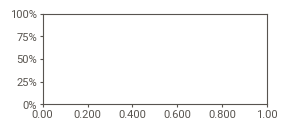

In [15]:
sv_af_df_featureEng = sv.analyze([af_df_featureEng, 'AF Data (Feature Engineered)'])
sv_af_df_featureEng.show_notebook(layout='widescreen', scale=0.8)

In [16]:
# check if any element is infinite
is_inf = af_df_featureEng.isin([np.inf, -np.inf]).any()

# get columns that contain inf values & count number of infs in each column
columns_with_inf = af_df_featureEng.columns[is_inf].tolist()
inf_count = af_df_featureEng[columns_with_inf].apply(lambda x: np.sum(np.isinf(x)))
print(inf_count)

triangular_index    1
cvi                 3
dtype: int64


In [17]:
# Identify rows with inf values
inf_rows = af_df_featureEng[af_df_featureEng.isin([np.inf, -np.inf]).any(axis=1)].index

# Drop rows with inf values
af_df_featureEng = af_df_featureEng.drop(index=inf_rows)

print(af_df_featureEng.shape)
af_df_featureEng.head()

(1049993, 32)


af    mean_nni       sdnn       sdsd  nni_50   pnni_50  nni_20   pnni_20  \
0  0  771.833333  46.358486  42.561420       1  3.448276       1  3.448276   
1  0  788.666667   6.149479   7.112983       0  0.000000       0  0.000000   
2  0  790.000000   8.304548   8.898957       0  0.000000       0  0.000000   
3  0  792.333333   8.976342   9.559253       0  0.000000       0  0.000000   
4  0  784.166667  10.754577   8.379381       0  0.000000       0  0.000000   

       rmssd  median_nni  range_nni      cvsd     cvnni    mean_hr  \
0  43.460247       780.0        265  0.056308  0.060063  78.115535   
1   7.131765       790.0         25  0.009043  0.007797  76.082249   
2   8.905636       790.0         35  0.011273  0.010512  75.957444   
3   9.559253       792.5         35  0.012065  0.011329  75.735114   
4   8.407714       782.5         35  0.010722  0.013715  76.528198   

       max_hr     min_hr    std_hr        vlf         lf         hf  \
0  112.149533  75.000000  6.430783  34.959704  71.201250  24.396620   
1   77.419355  75.000000  0.584538   2.853465   2.795767  11.057630   
2   77.419355  74.074074  0.781545  11.392116  18.693604  19.919897   
3   77.419355  74.074074  0.844818  10.752915  16.546887  29.719194   
4   77.922078  74.534161  1.027328  11.581953  41.690079   9.453751   

   lf_hf_ratio       lfnu       hfnu  total_power  triangular_index  tinn  \
0     2.918488  74.479954  25.520046   130.557575          3.750000  None   
1     0.252836  20.181090  79.818910    16.706862          1.875000  None   
2     0.938439  48.412094  51.587906    50.005617          2.142857  None   
3     0.556774  35.764619  64.235381    57.018997          2.500000  None   
4     4.409898  81.515363  18.484637    62.725783          3.750000  None   

        csi       cvi  Modified_csi        sd1        sd2  ratio_sd2_sd1  
0  1.892593  4.453419    438.829104  30.628173  57.966658       1.892593  
1  1.373551  2.760278     38.628383   5.118666   7.030750       1.373551  
2  1.537323  3.003773     60.538909   6.403894   9.844856       1.537323  
3  1.550942  3.069773     66.188138   6.879057  10.669020       1.550942  
4  2.315565  3.129411    129.327476   6.029995  13.962844       2.315565

In [18]:
def display_missing(df):
    print('\nMissing values:')
    for col in df.columns.tolist():
        missing_count = df[col].isnull().sum()
        missing_percent = (missing_count / len(df)) * 100
        print('{}: {} ({:.2f}%)'.format(col, missing_count, missing_percent))
    print('\n')


display_missing(af_df_featureEng)


Missing values:
af: 0 (0.00%)
mean_nni: 0 (0.00%)
sdnn: 0 (0.00%)
sdsd: 0 (0.00%)
nni_50: 0 (0.00%)
pnni_50: 0 (0.00%)
nni_20: 0 (0.00%)
pnni_20: 0 (0.00%)
rmssd: 0 (0.00%)
median_nni: 0 (0.00%)
range_nni: 0 (0.00%)
cvsd: 0 (0.00%)
cvnni: 0 (0.00%)
mean_hr: 0 (0.00%)
max_hr: 0 (0.00%)
min_hr: 0 (0.00%)
std_hr: 0 (0.00%)
vlf: 0 (0.00%)
lf: 0 (0.00%)
hf: 0 (0.00%)
lf_hf_ratio: 0 (0.00%)
lfnu: 0 (0.00%)
hfnu: 0 (0.00%)
total_power: 0 (0.00%)
triangular_index: 0 (0.00%)
tinn: 1049993 (100.00%)
csi: 133 (0.01%)
cvi: 133 (0.01%)
Modified_csi: 133 (0.01%)
sd1: 0 (0.00%)
sd2: 133 (0.01%)
ratio_sd2_sd1: 133 (0.01%)




In [19]:
# Drop tinn column, which only contains missing values
af_df_featureEng.drop(['tinn'], axis=1, inplace=True)

# Impute missing values with column mean
af_df_featureEng.fillna(af_df_featureEng.mean(), inplace=True)

# Check missing values again
display_missing(af_df_featureEng)


Missing values:
af: 0 (0.00%)
mean_nni: 0 (0.00%)
sdnn: 0 (0.00%)
sdsd: 0 (0.00%)
nni_50: 0 (0.00%)
pnni_50: 0 (0.00%)
nni_20: 0 (0.00%)
pnni_20: 0 (0.00%)
rmssd: 0 (0.00%)
median_nni: 0 (0.00%)
range_nni: 0 (0.00%)
cvsd: 0 (0.00%)
cvnni: 0 (0.00%)
mean_hr: 0 (0.00%)
max_hr: 0 (0.00%)
min_hr: 0 (0.00%)
std_hr: 0 (0.00%)
vlf: 0 (0.00%)
lf: 0 (0.00%)
hf: 0 (0.00%)
lf_hf_ratio: 0 (0.00%)
lfnu: 0 (0.00%)
hfnu: 0 (0.00%)
total_power: 0 (0.00%)
triangular_index: 0 (0.00%)
csi: 0 (0.00%)
cvi: 0 (0.00%)
Modified_csi: 0 (0.00%)
sd1: 0 (0.00%)
sd2: 0 (0.00%)
ratio_sd2_sd1: 0 (0.00%)




                                             |          | [  0%]   00:00 -> (? left)


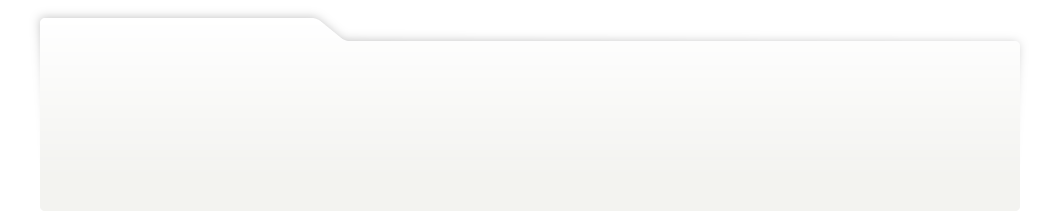
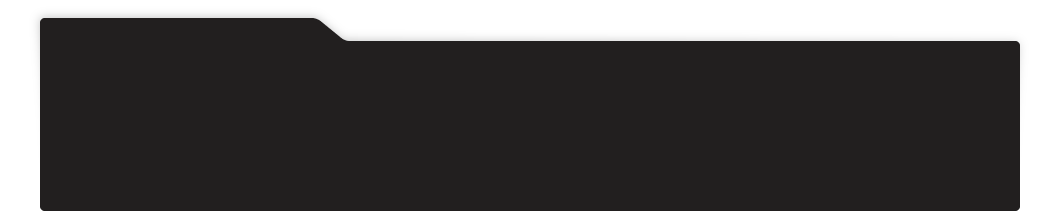
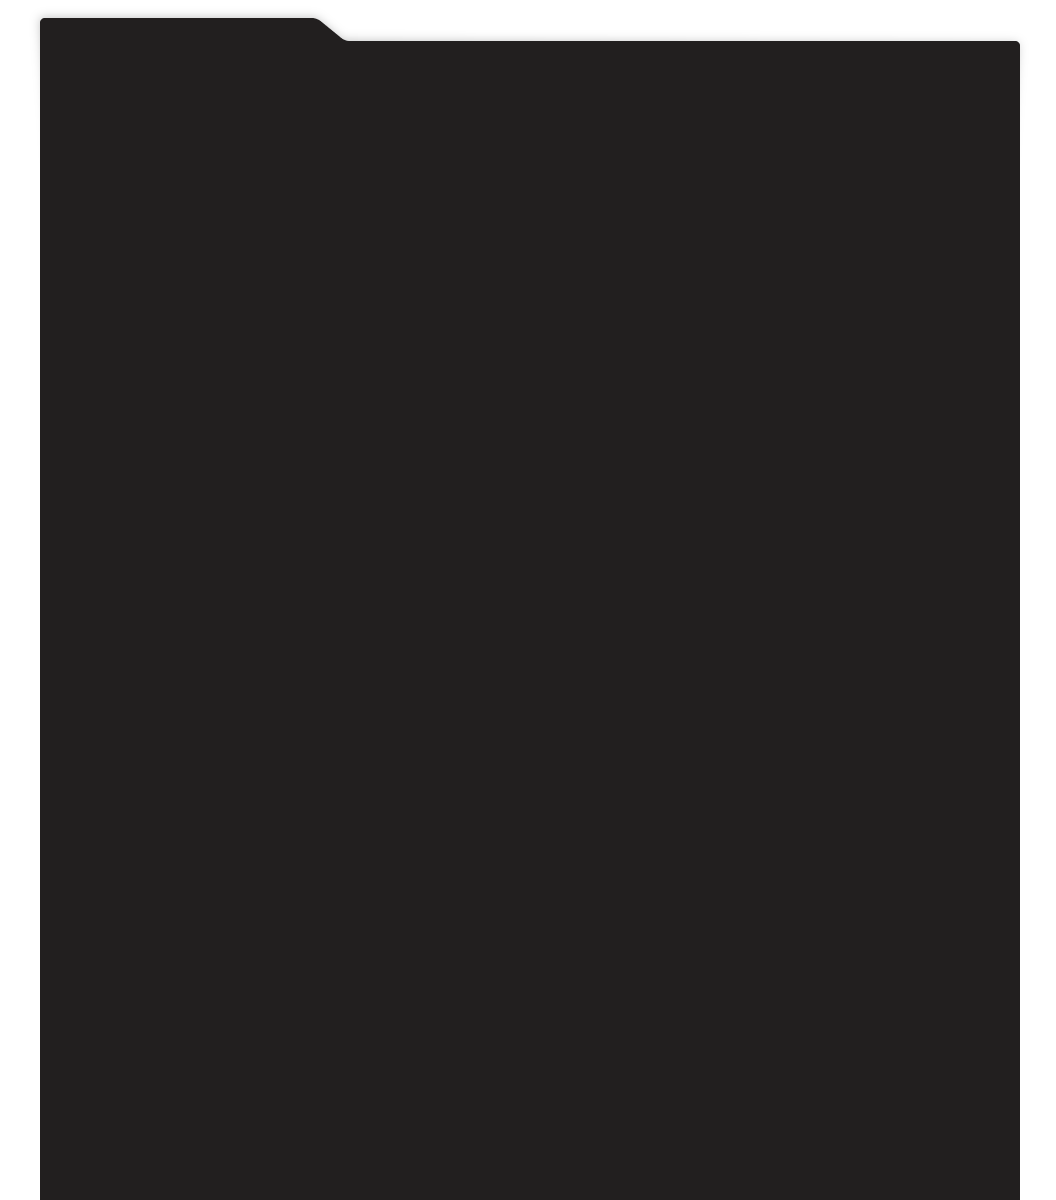
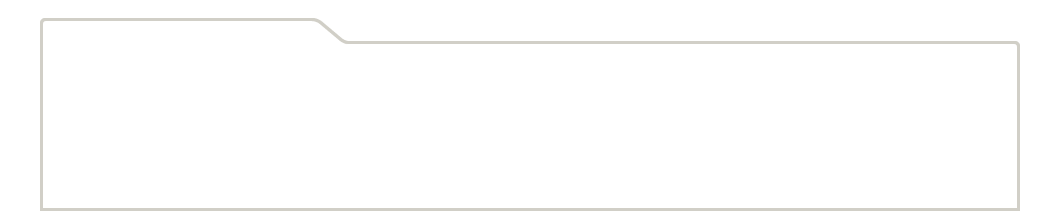
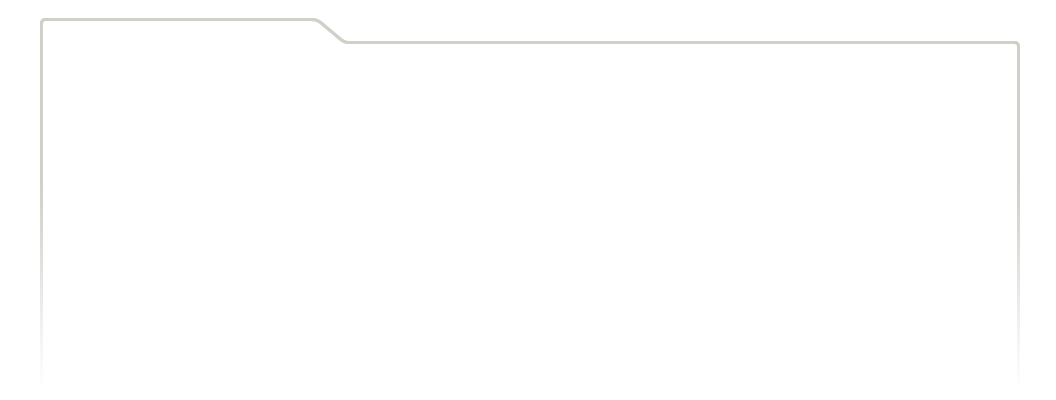
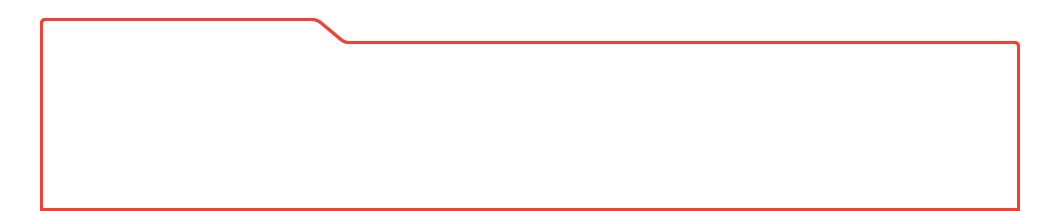
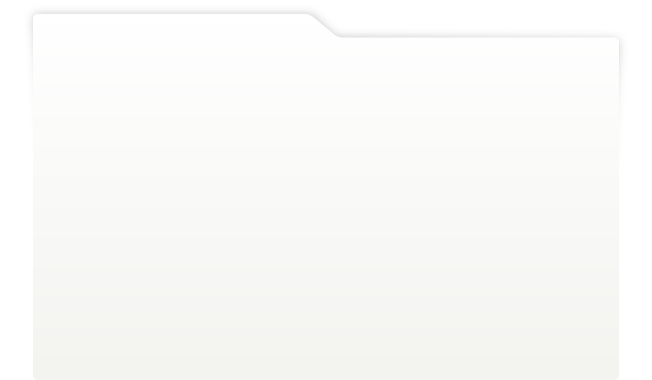
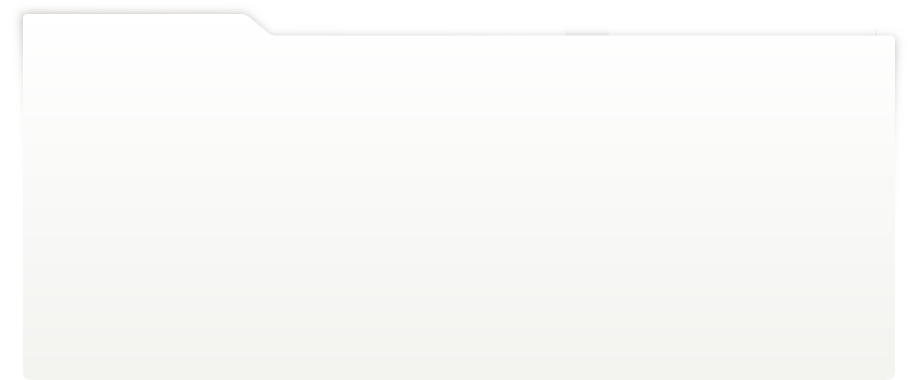
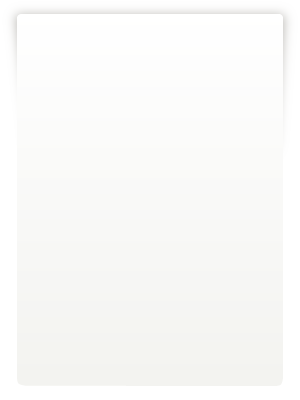
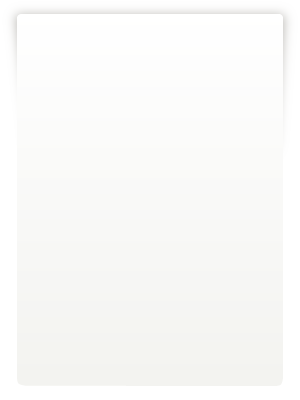
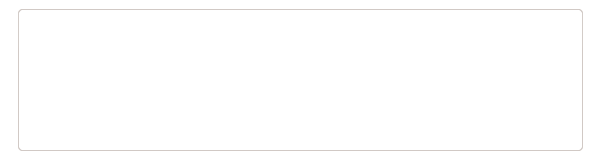
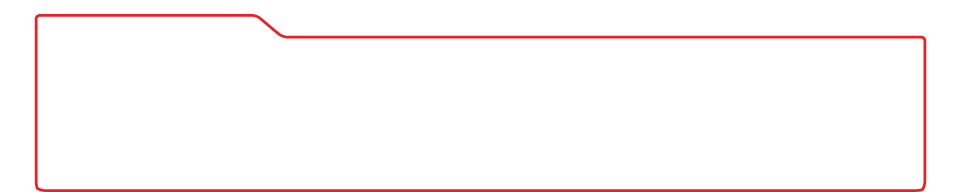
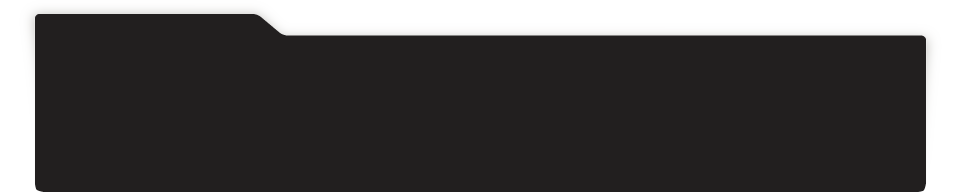
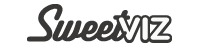
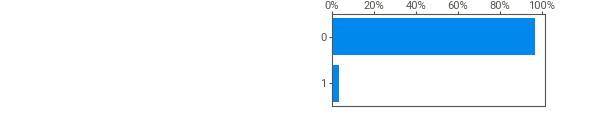
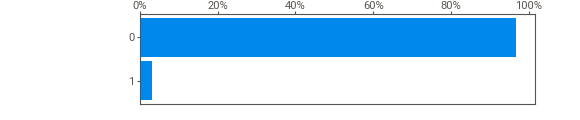
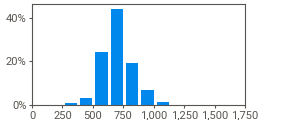
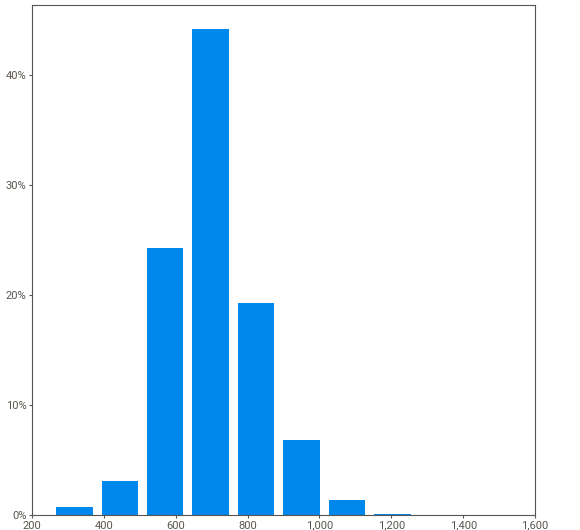
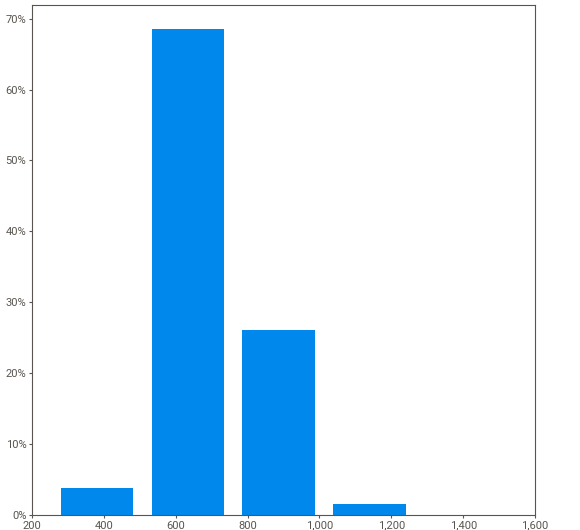
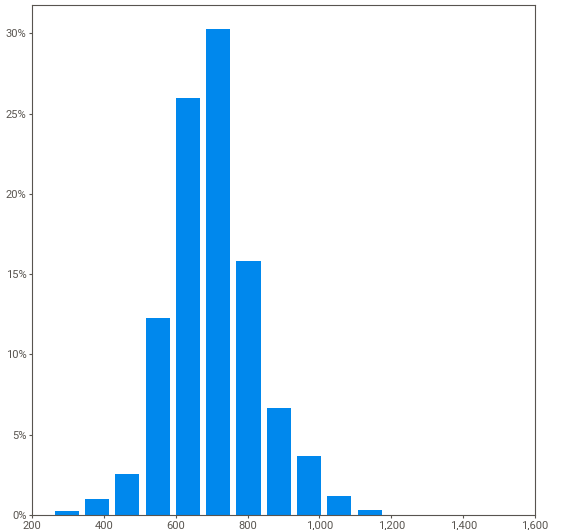
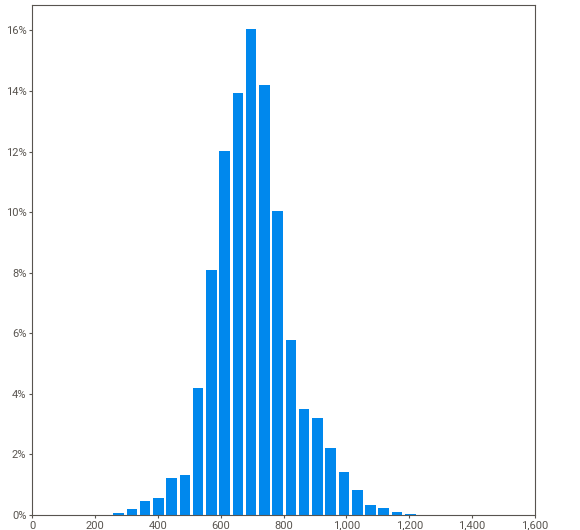
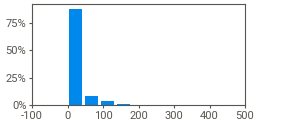
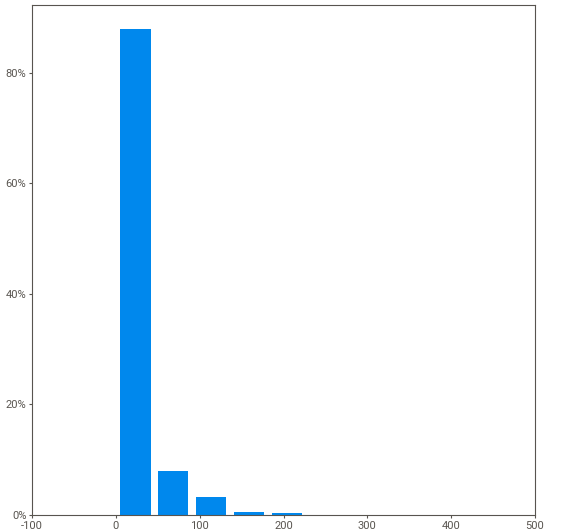
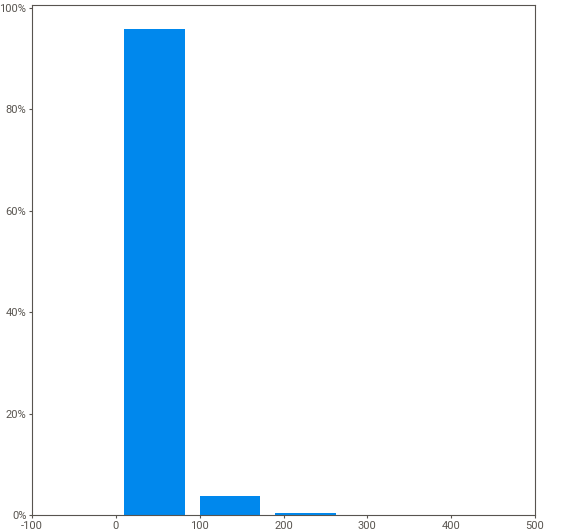
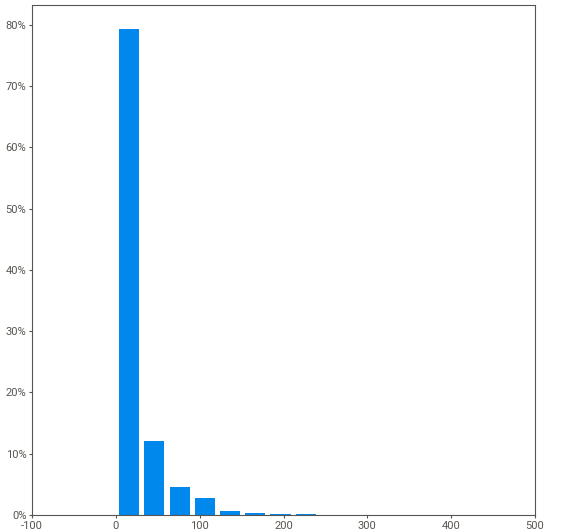
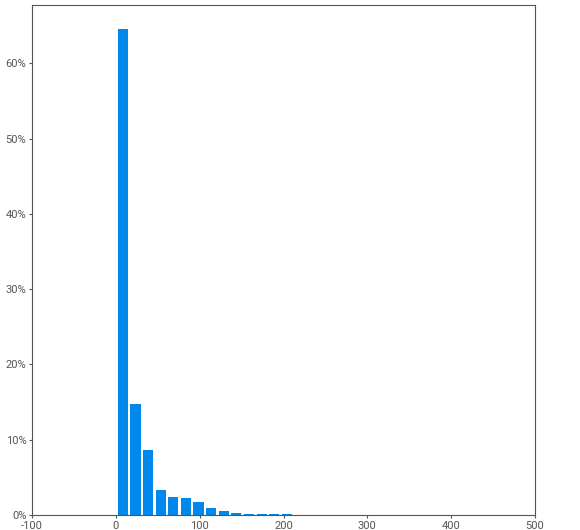
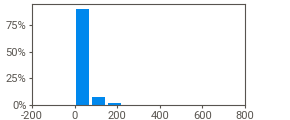
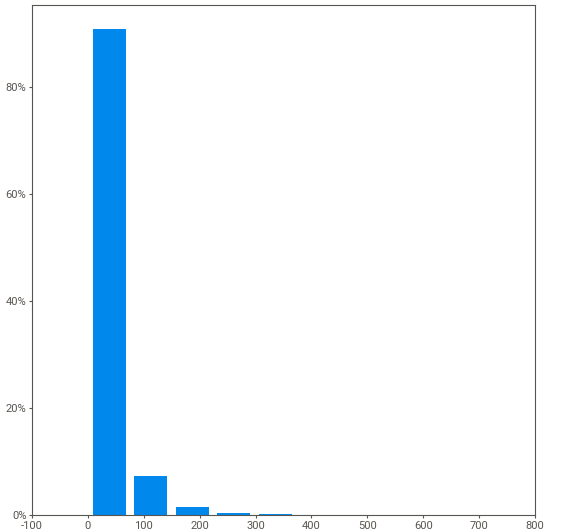
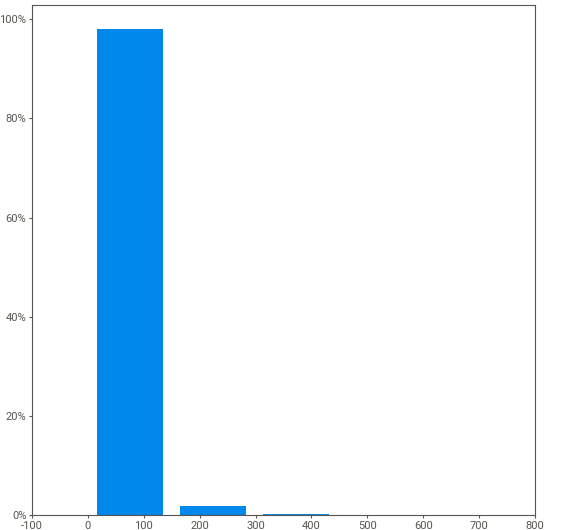
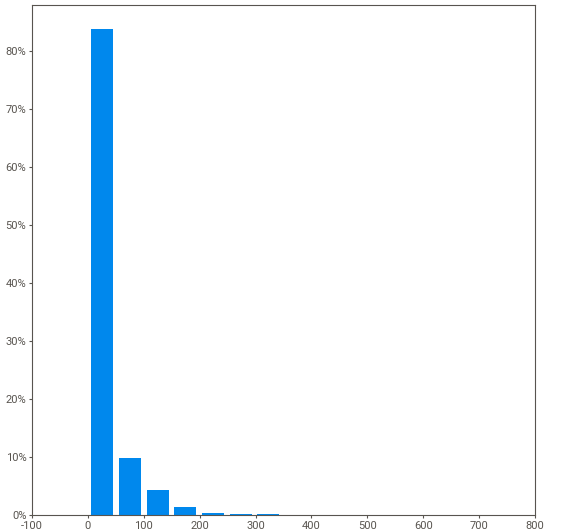
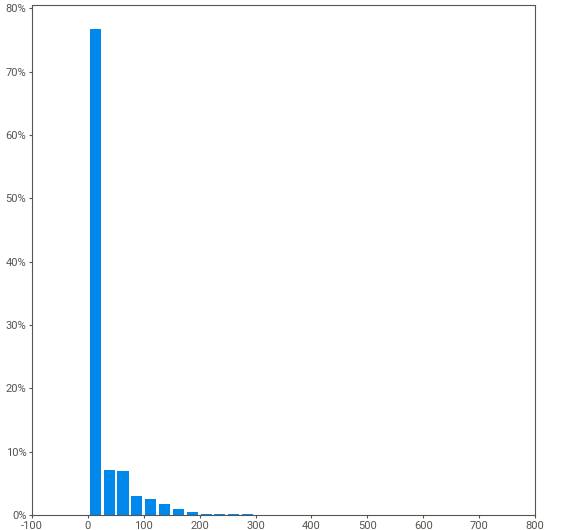
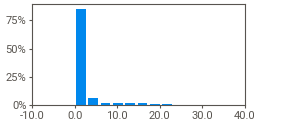
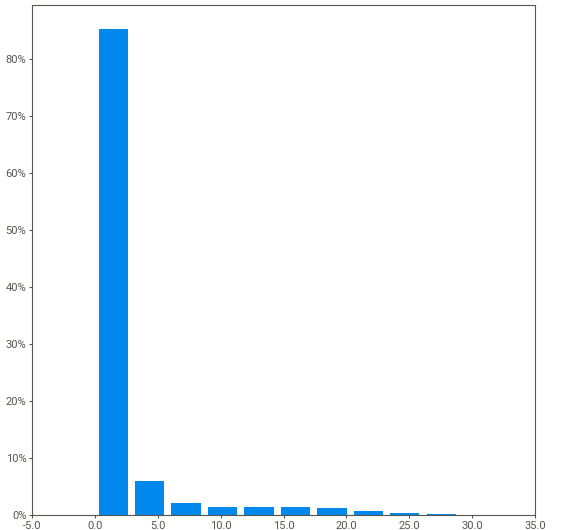
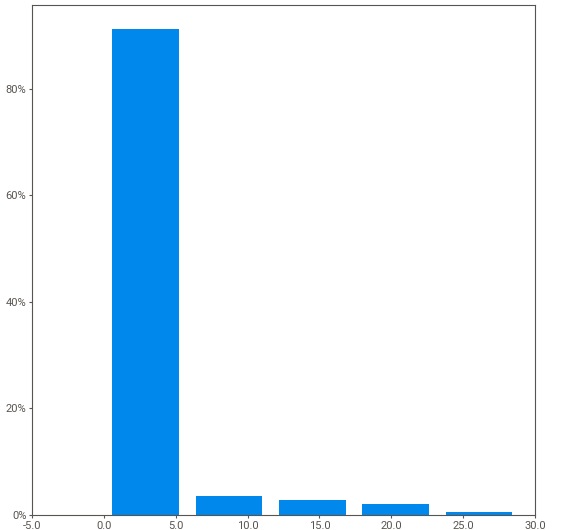
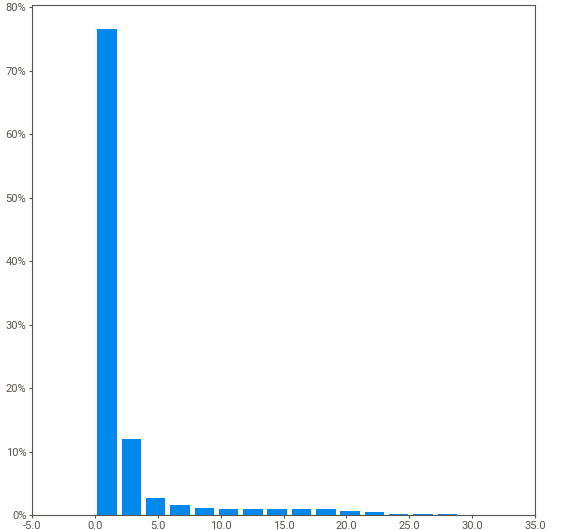
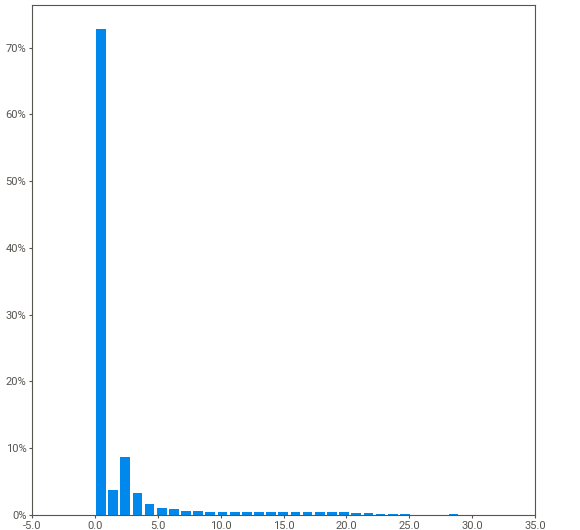
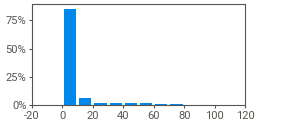
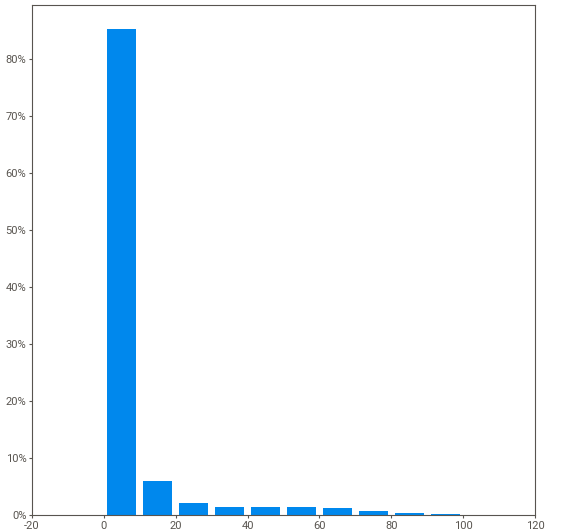
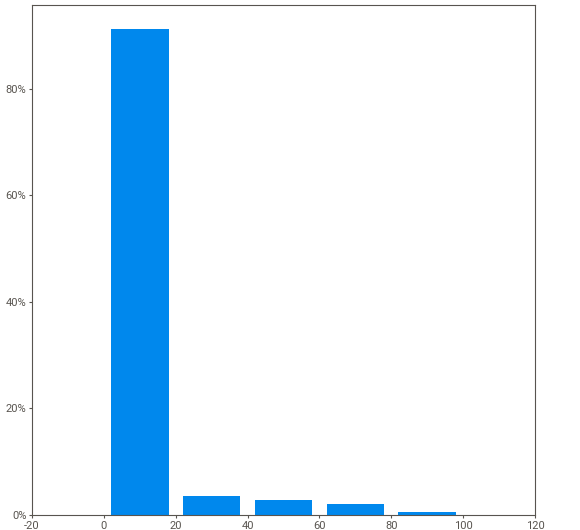
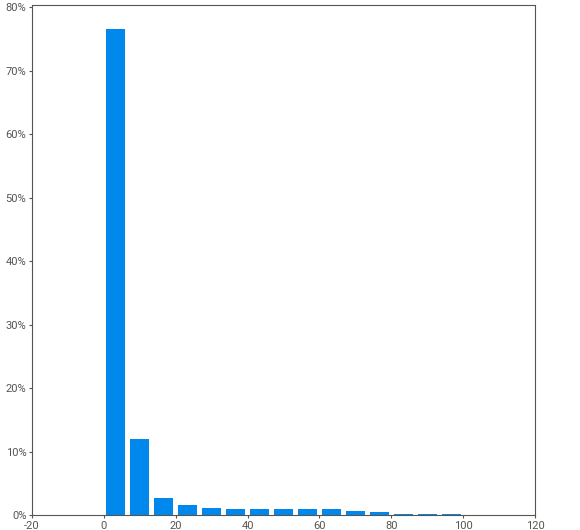
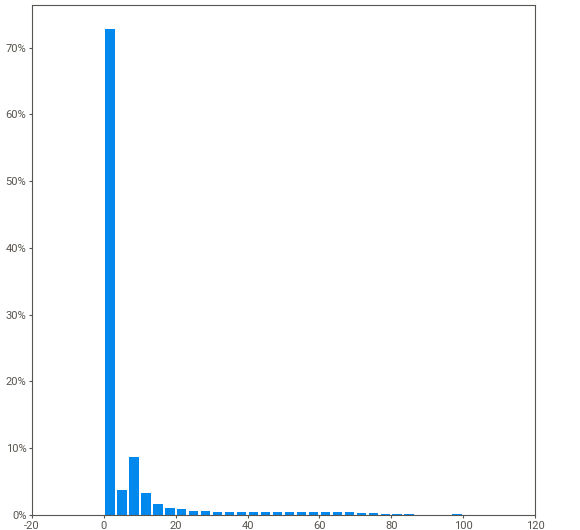
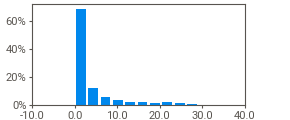
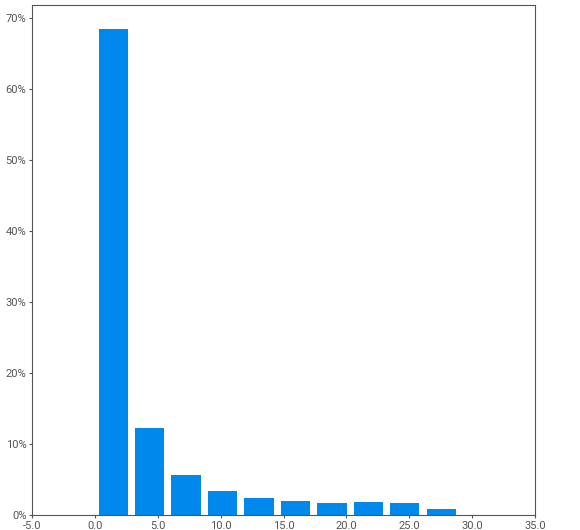
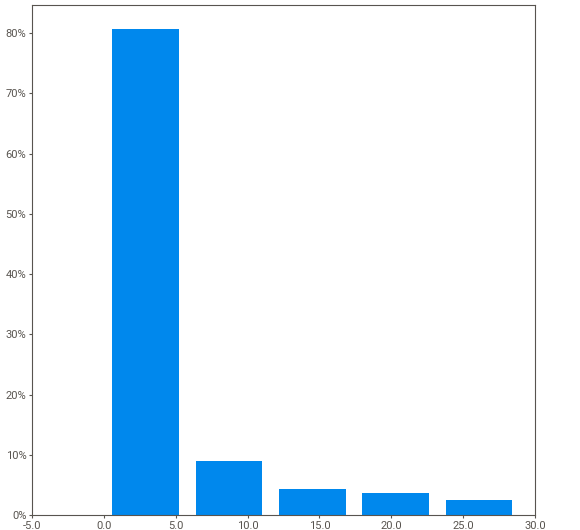
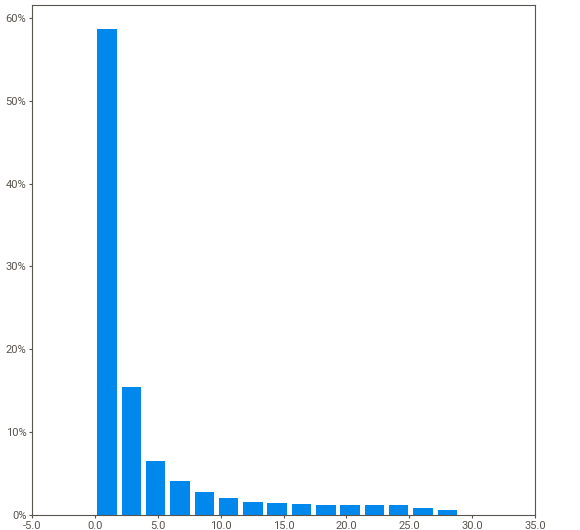
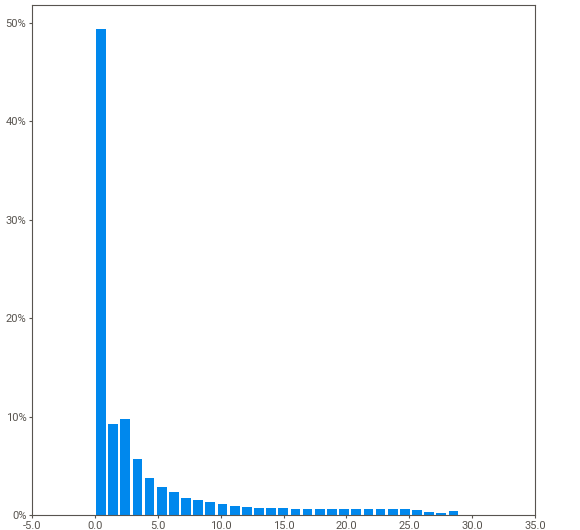
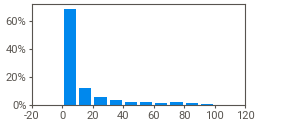
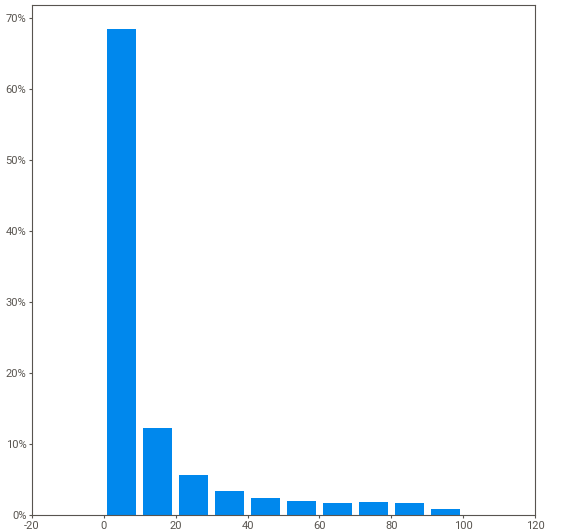
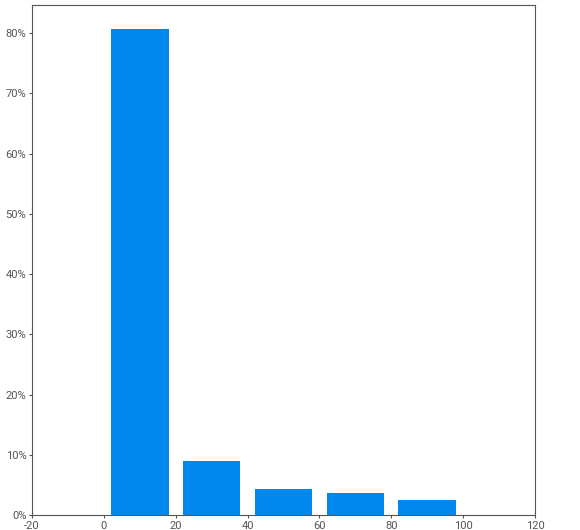
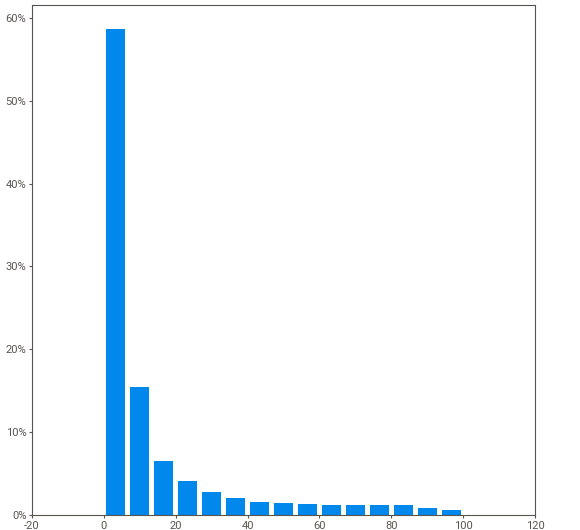
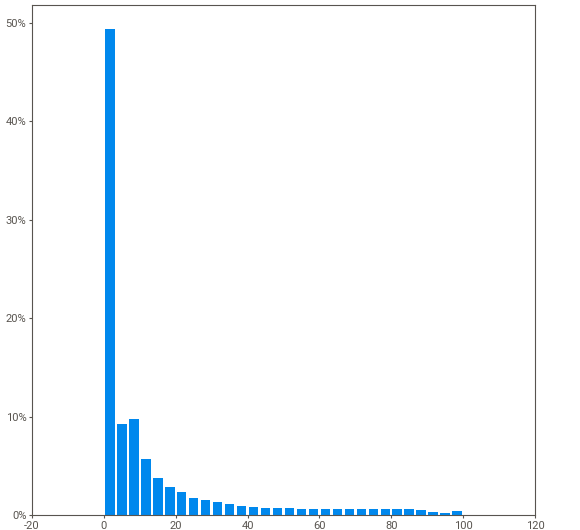
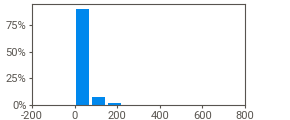
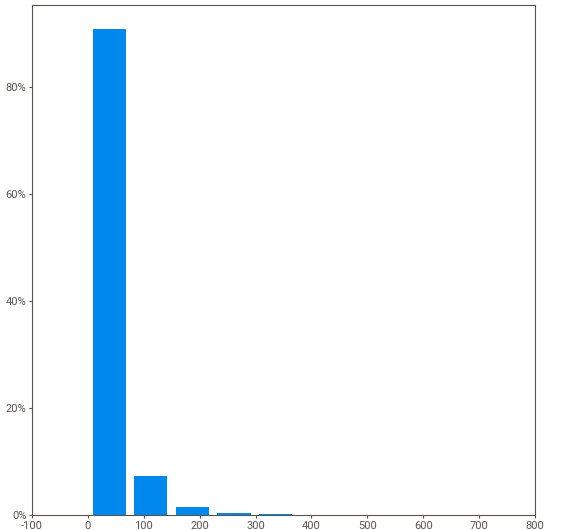
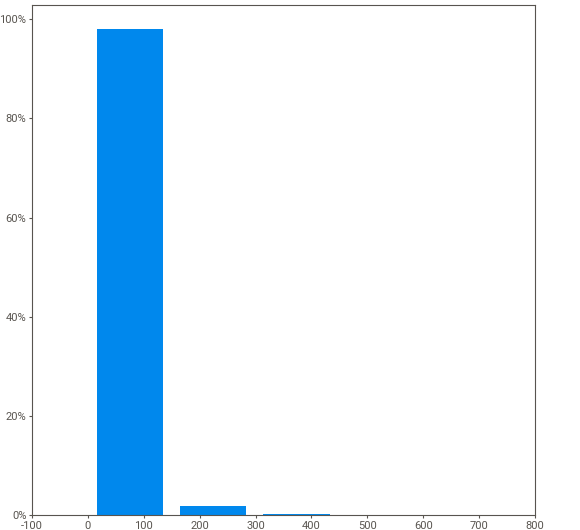
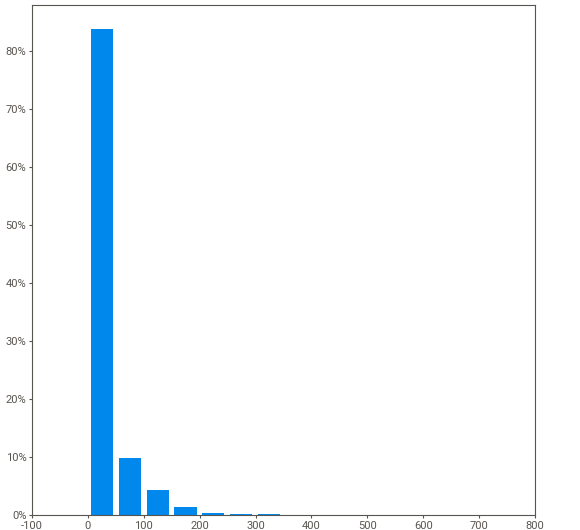
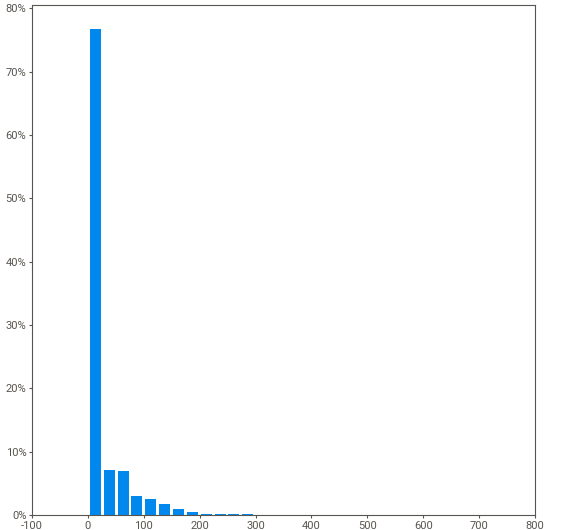
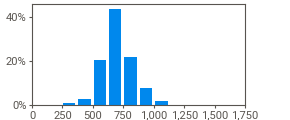
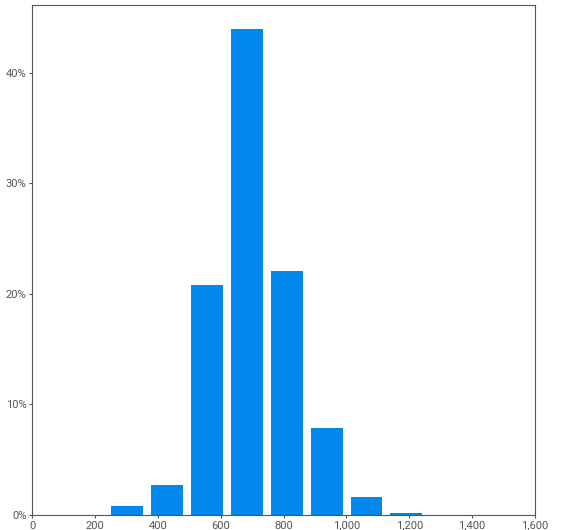
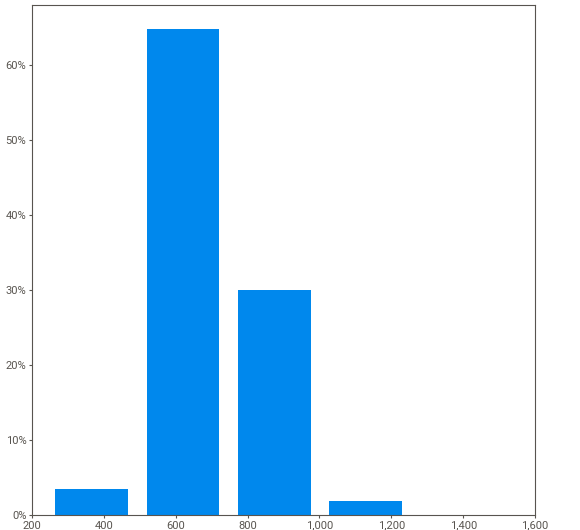
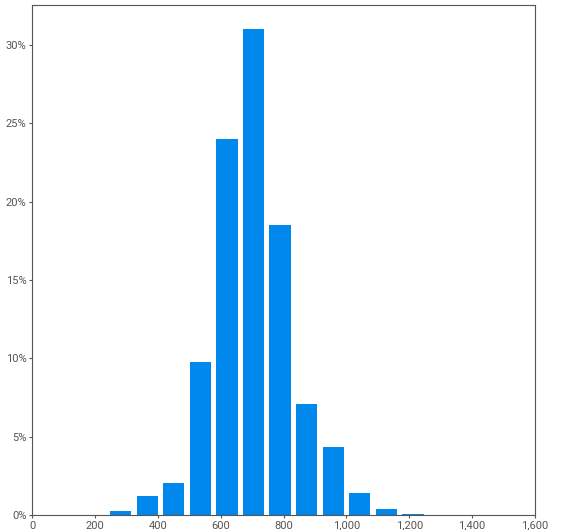
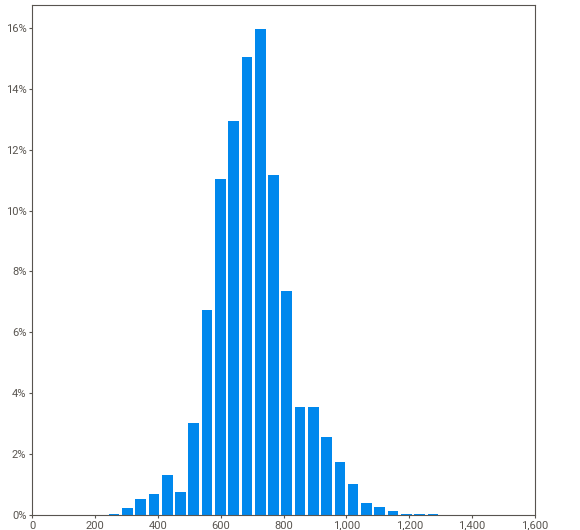
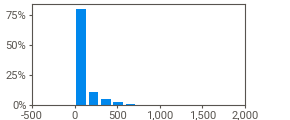
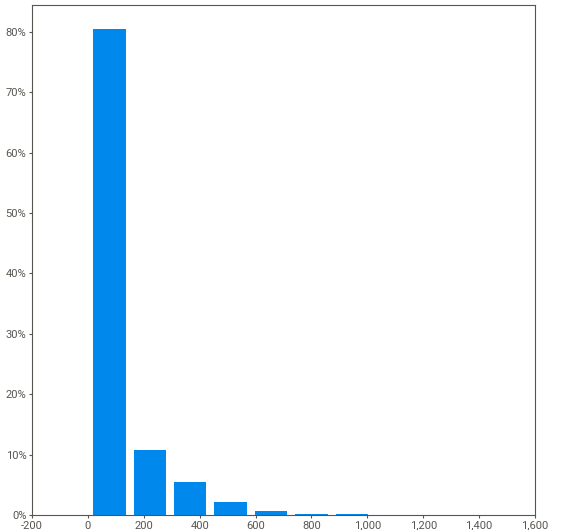
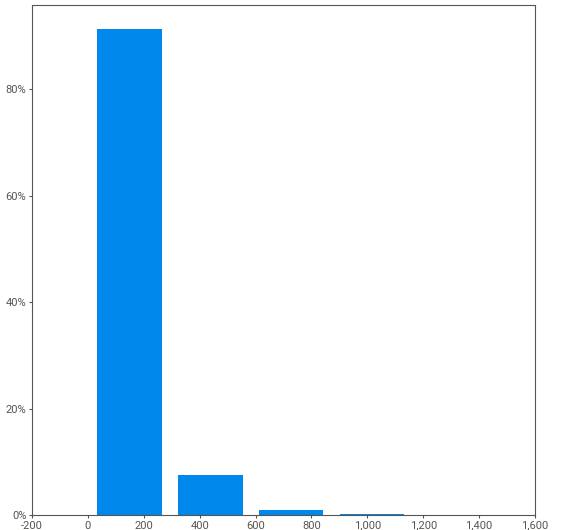
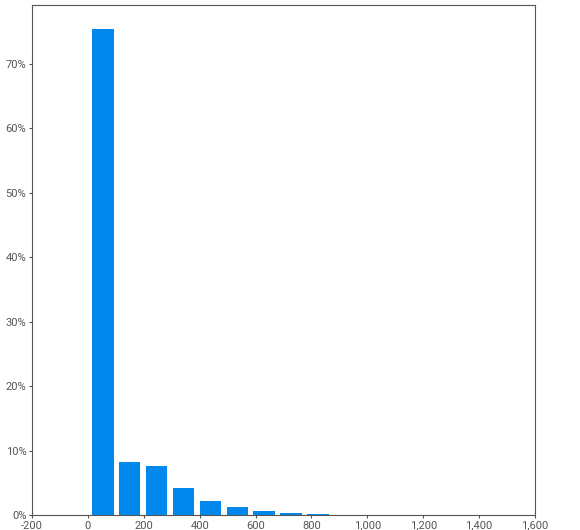
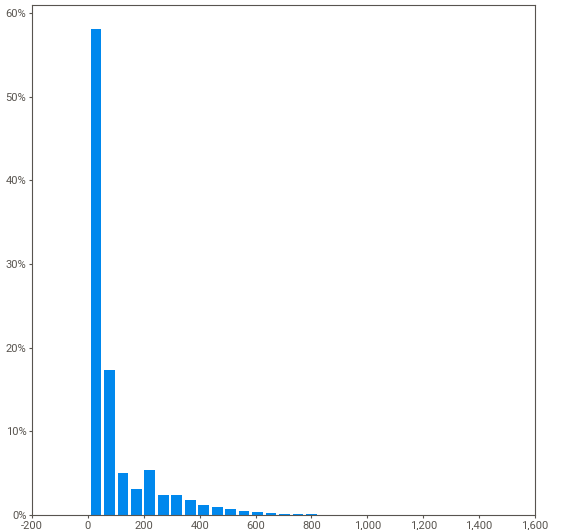
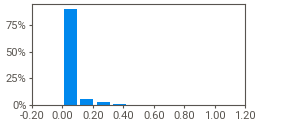
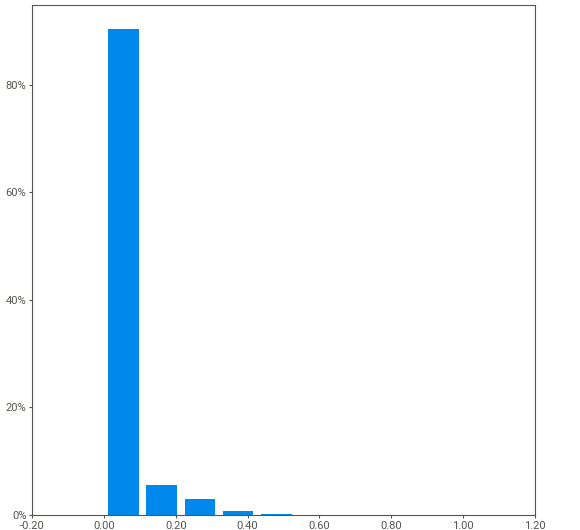
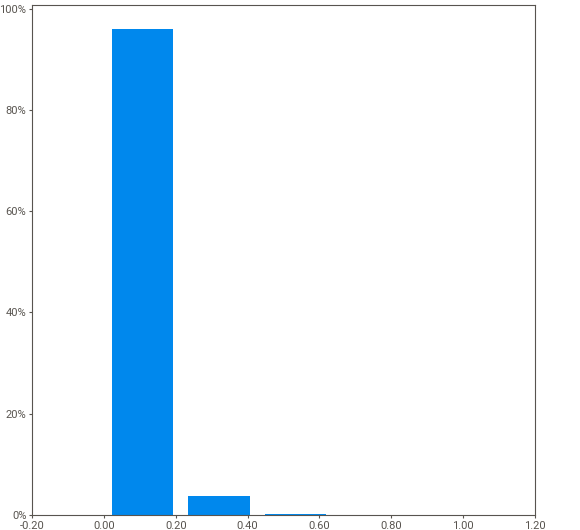
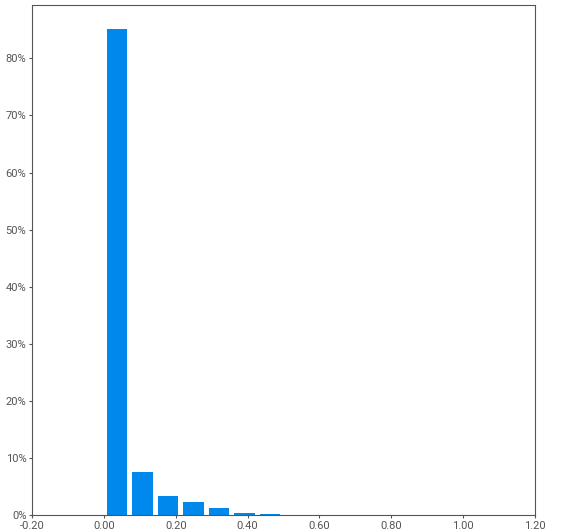
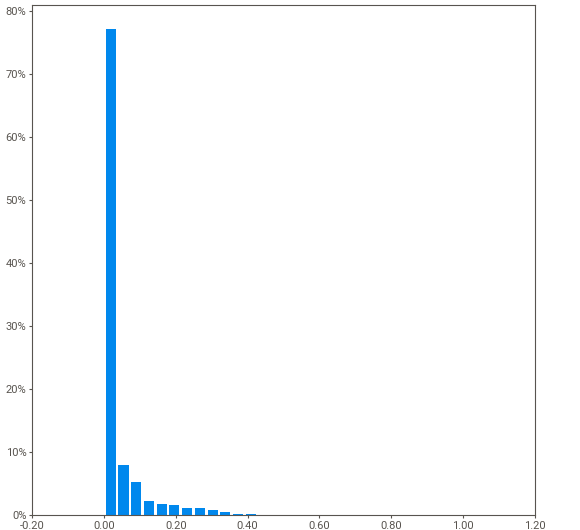
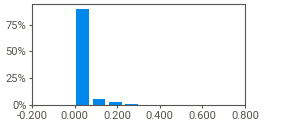
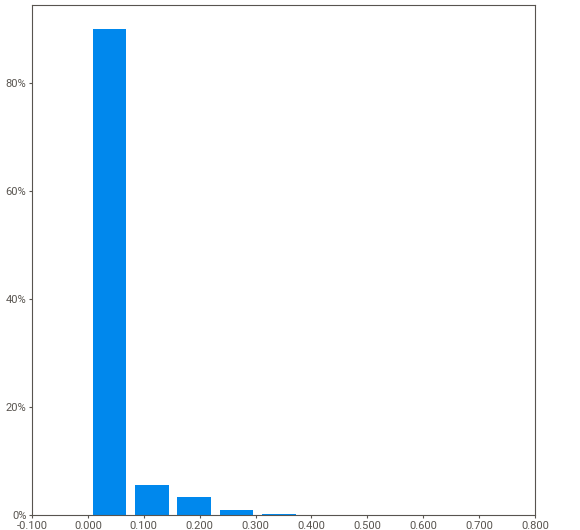
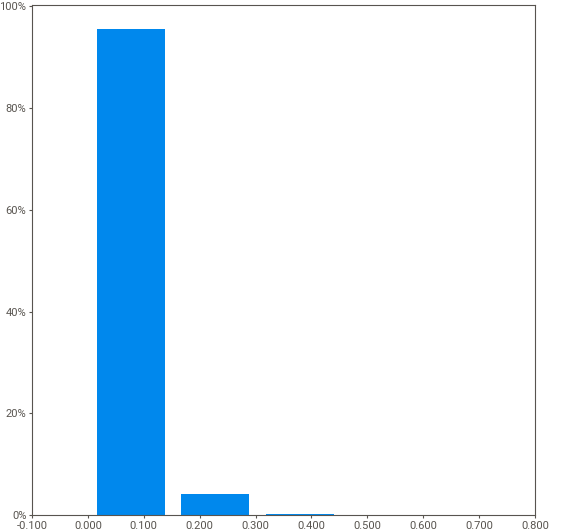
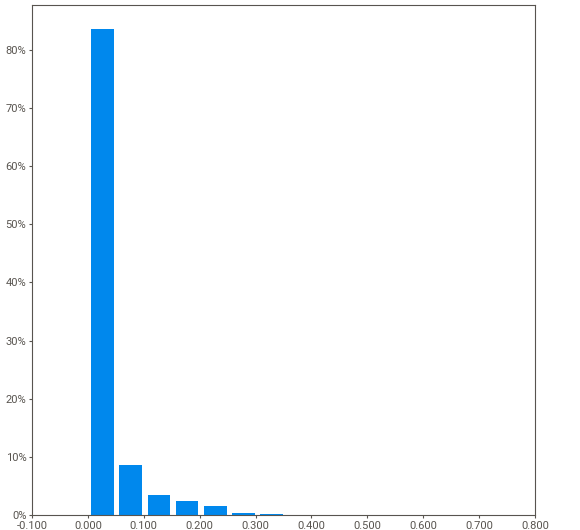
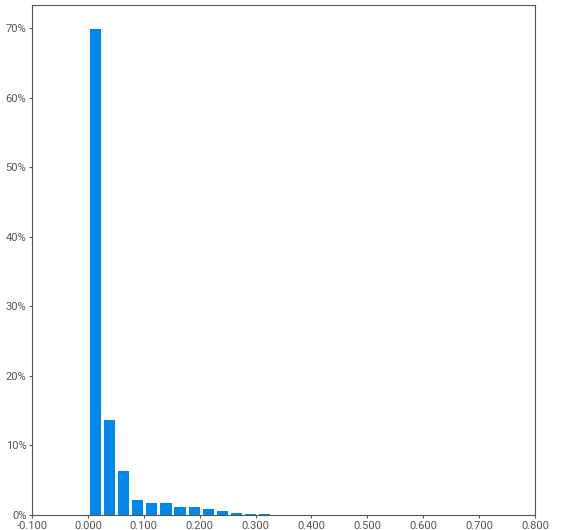
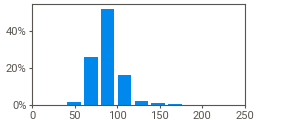
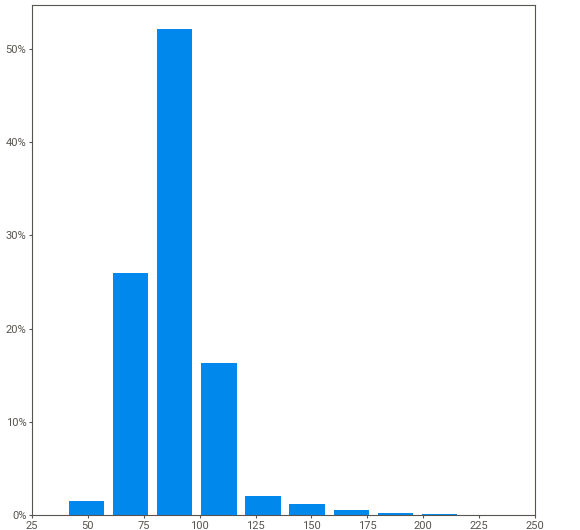
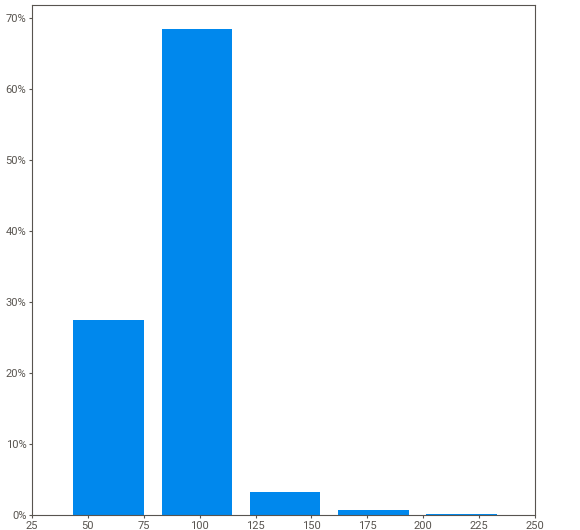
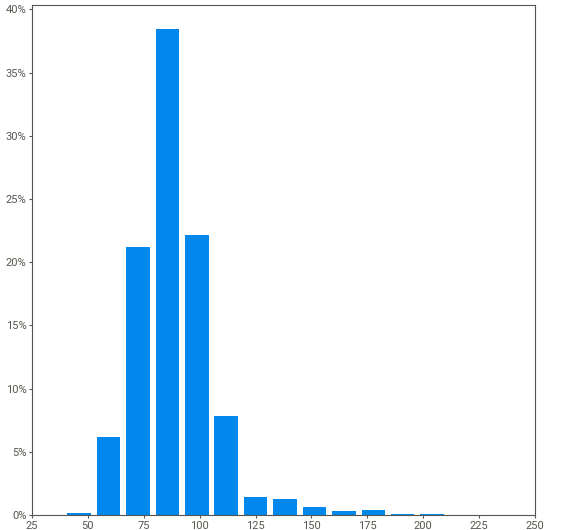
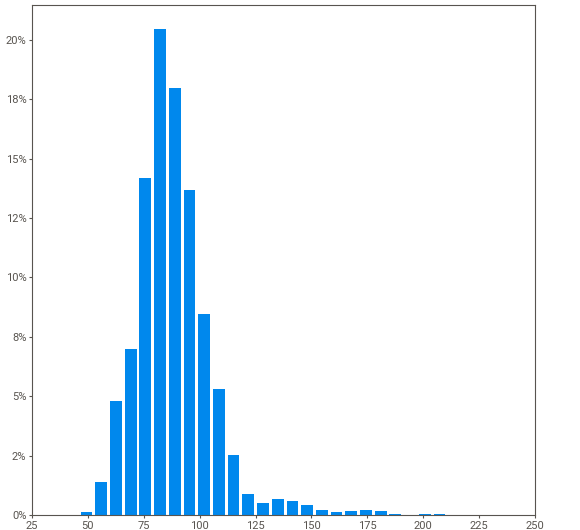
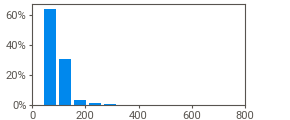
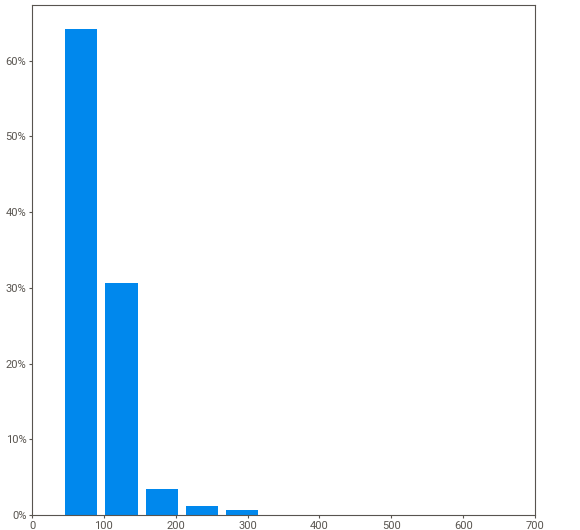
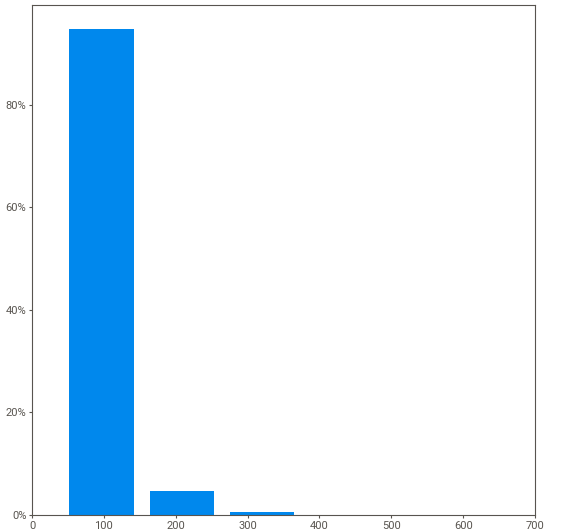
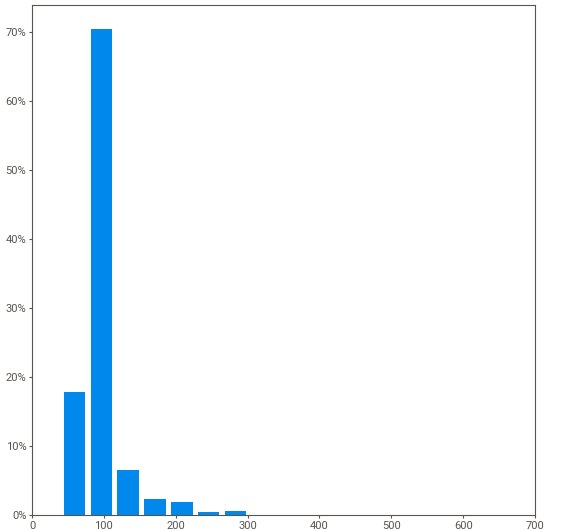
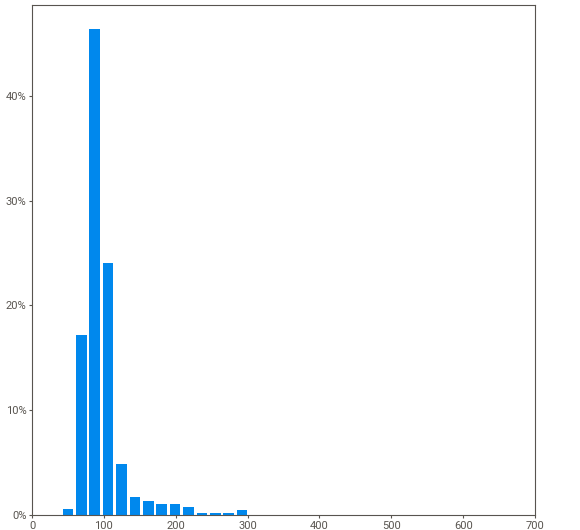
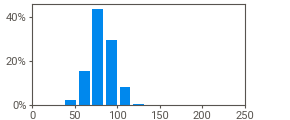
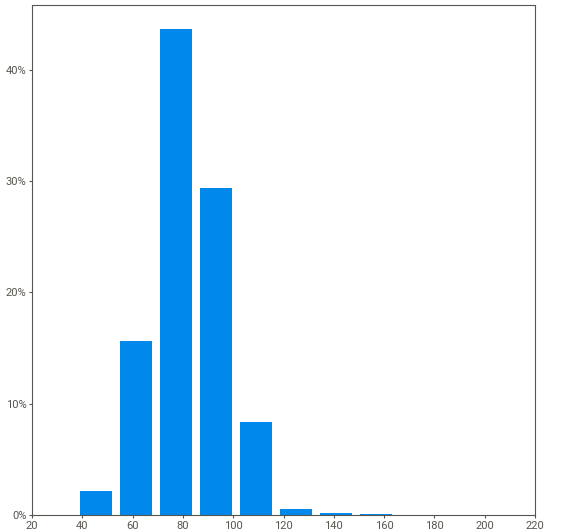
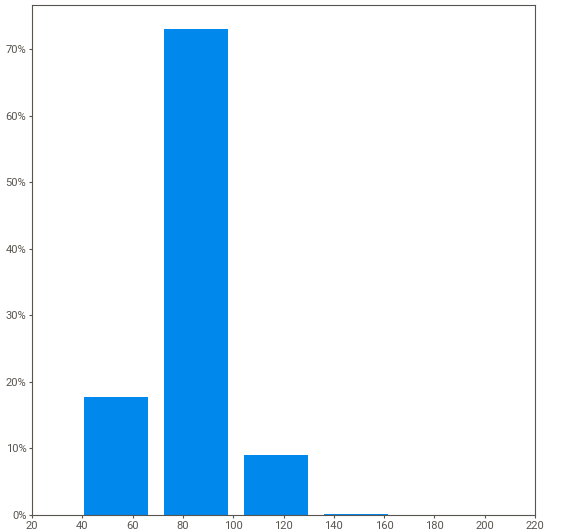
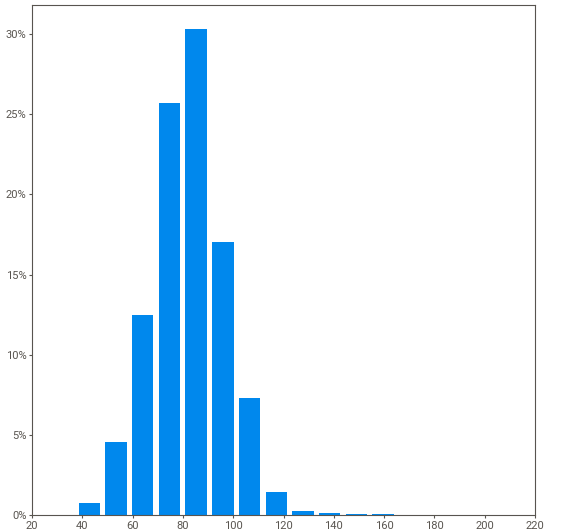
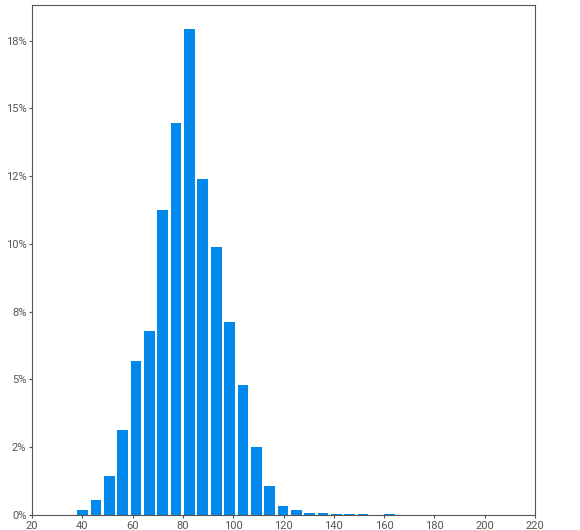
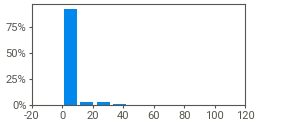
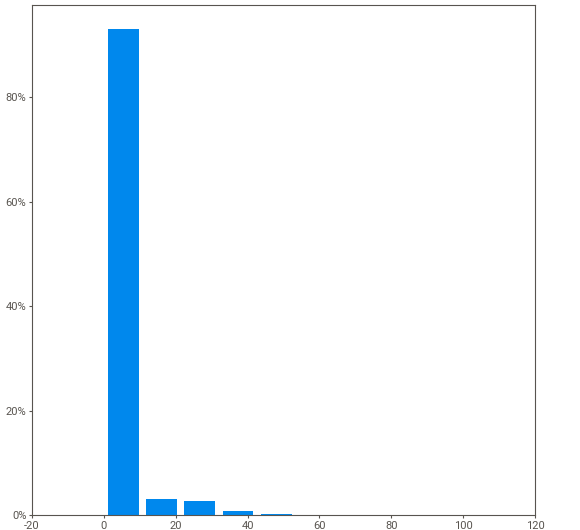
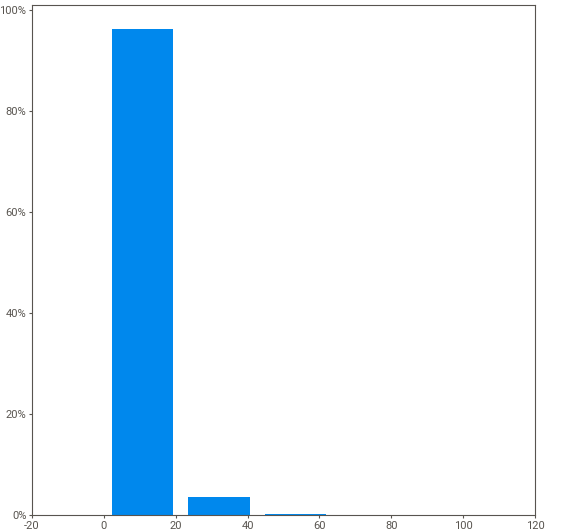
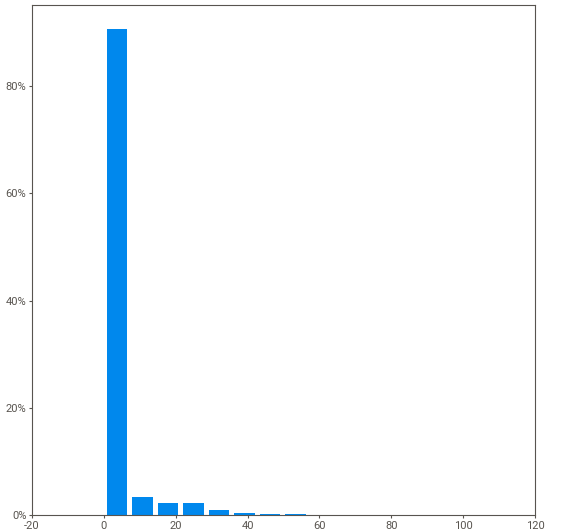
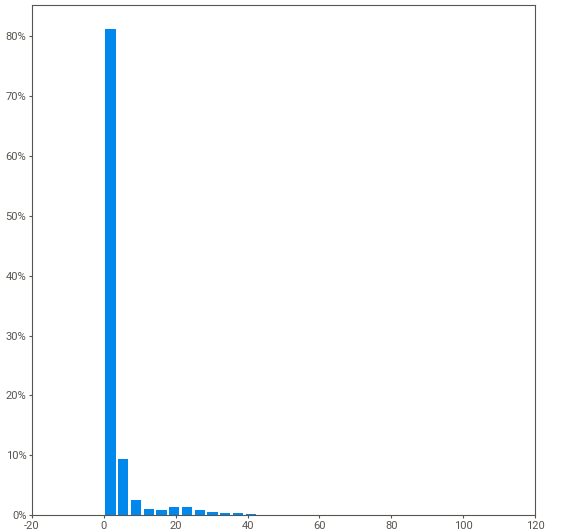
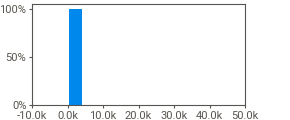
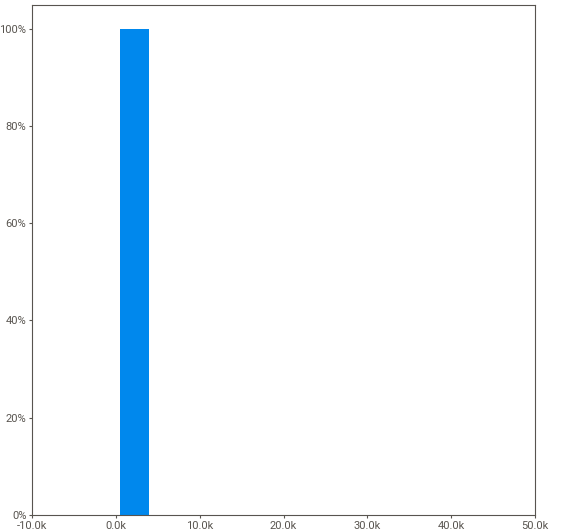
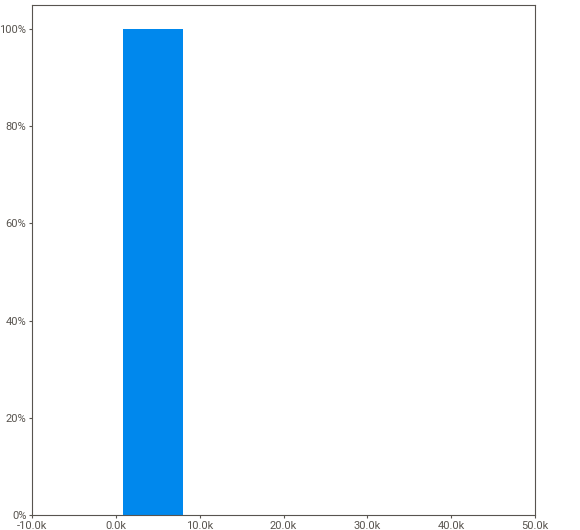
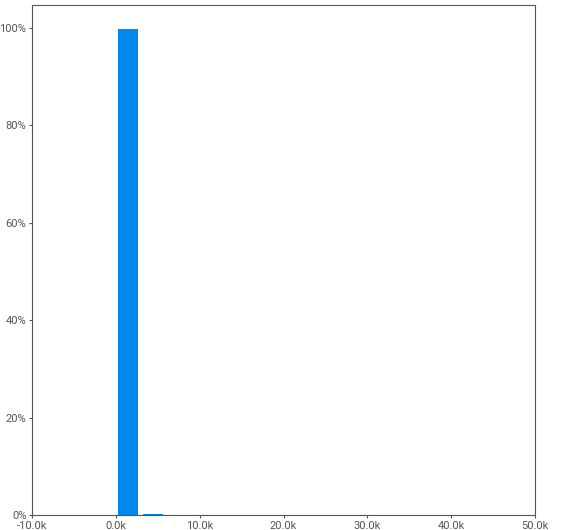
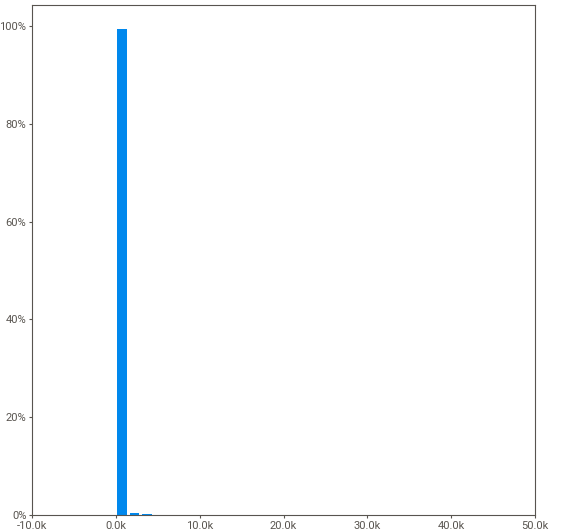
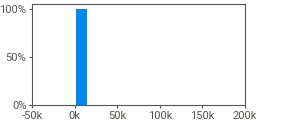
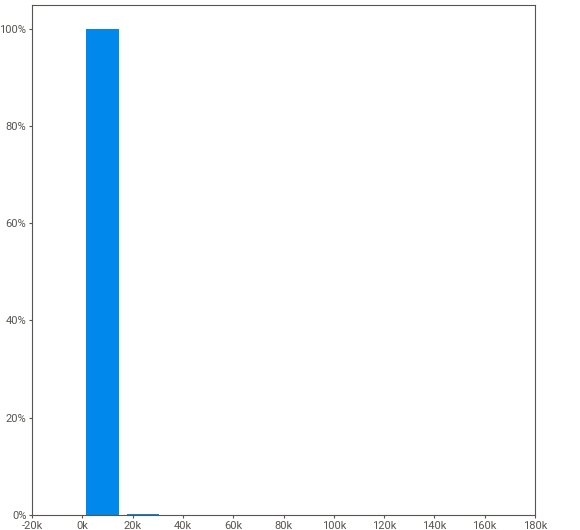
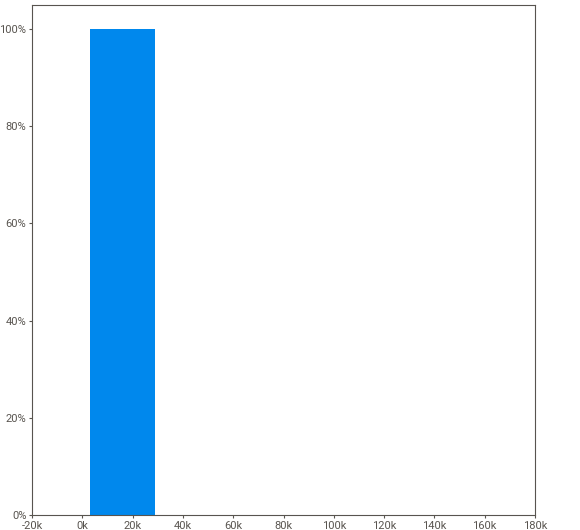
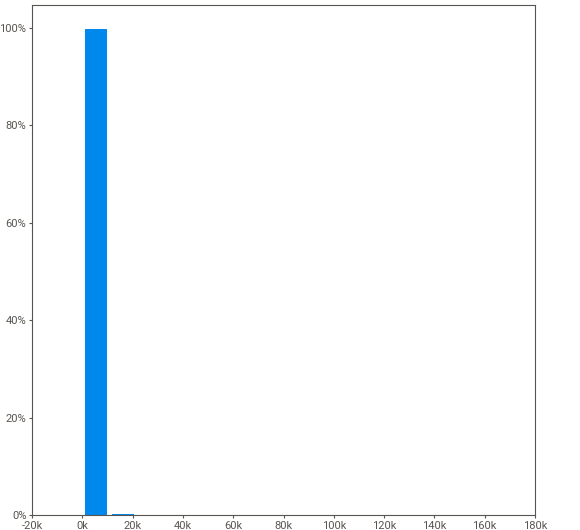
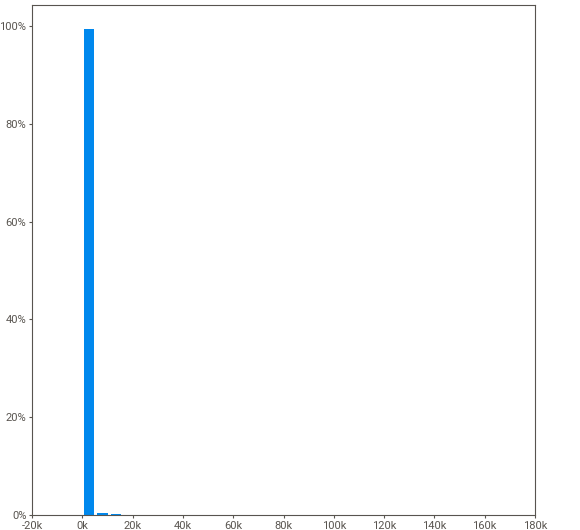
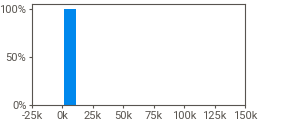
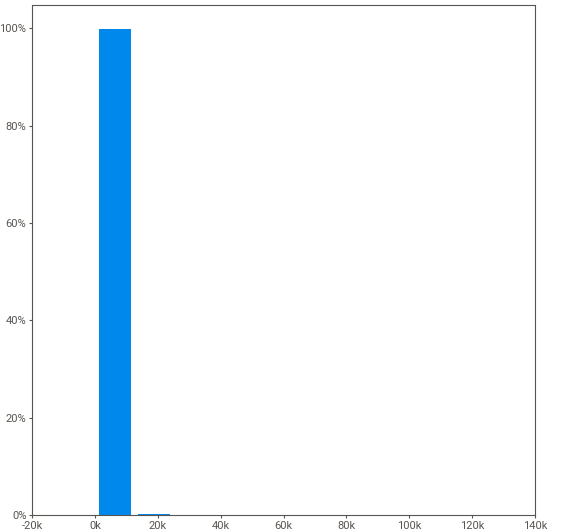
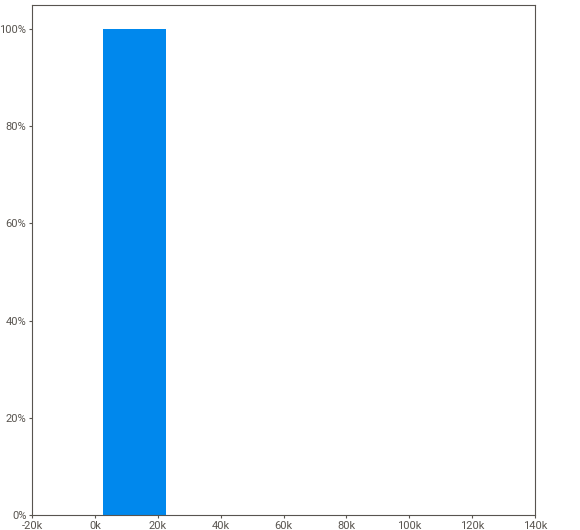
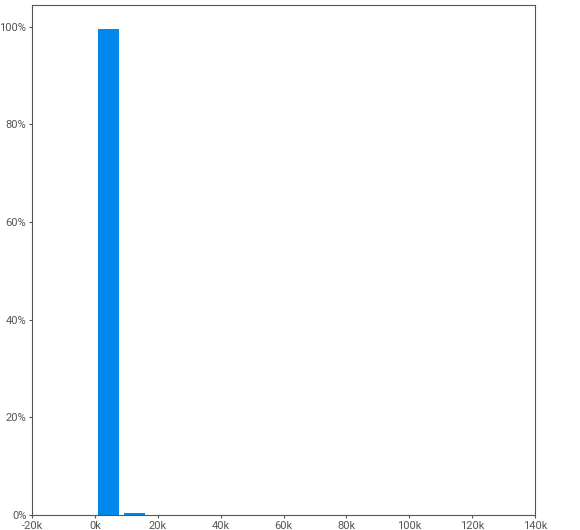
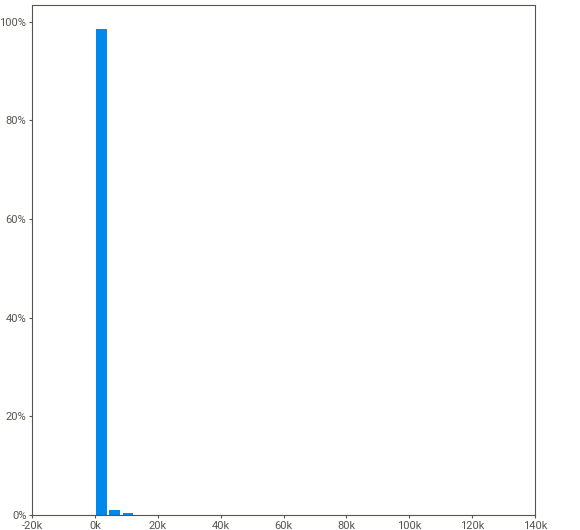
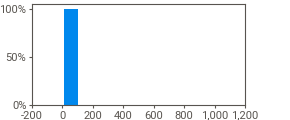
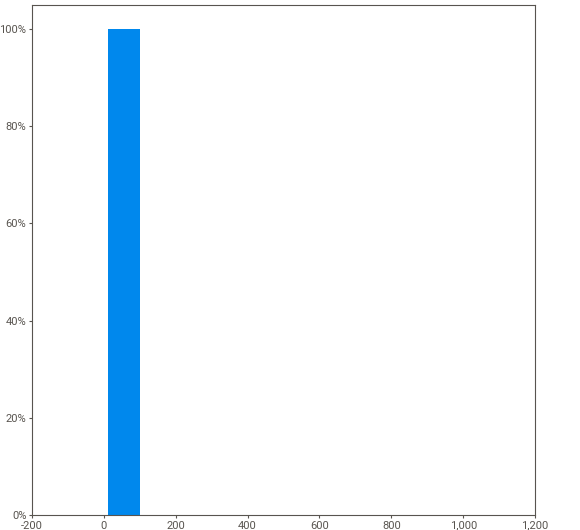
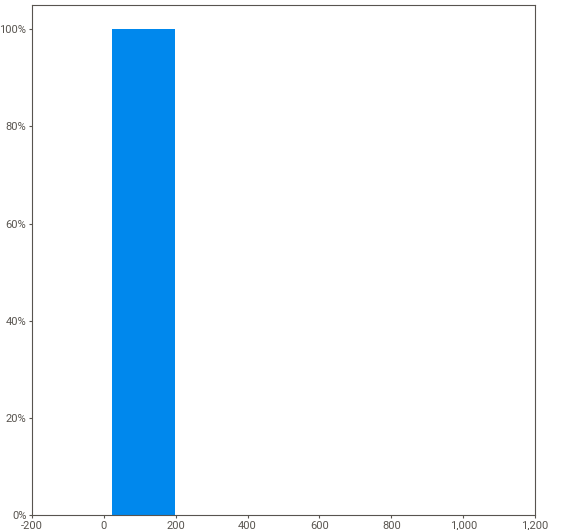
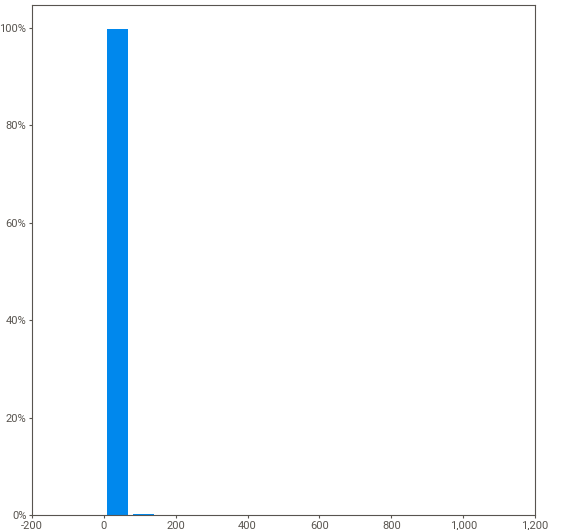
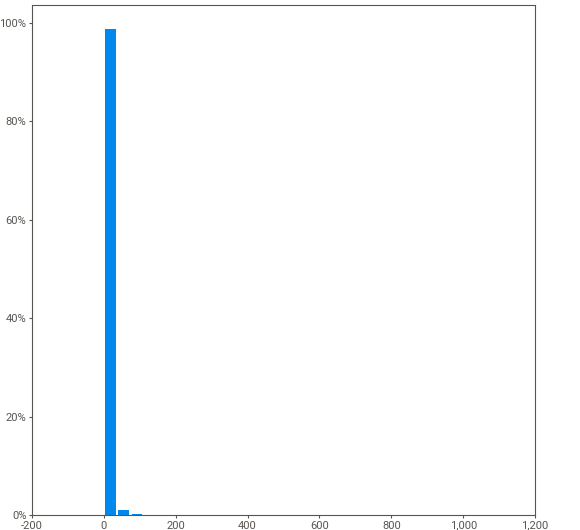
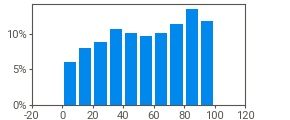
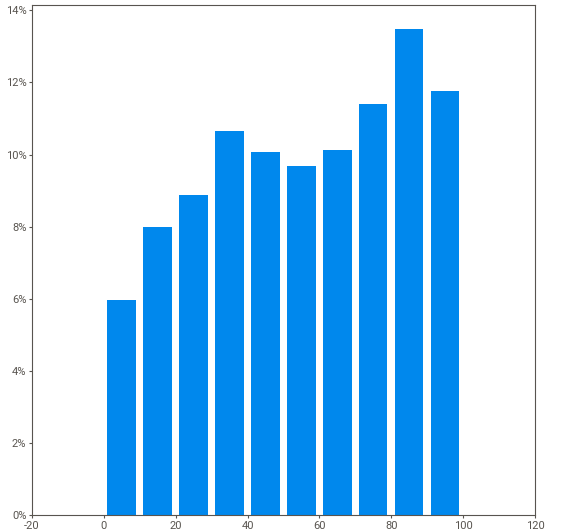
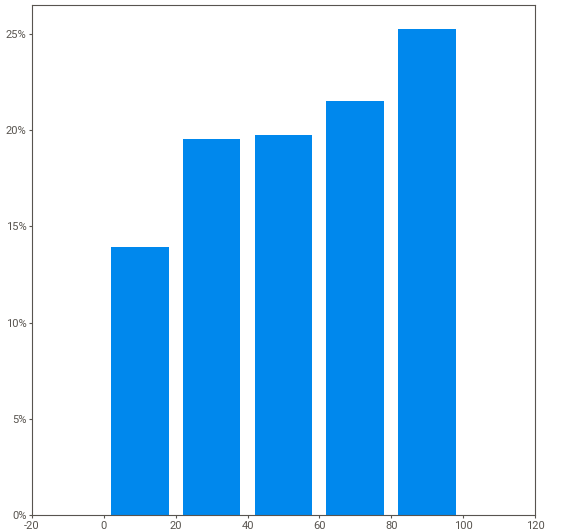
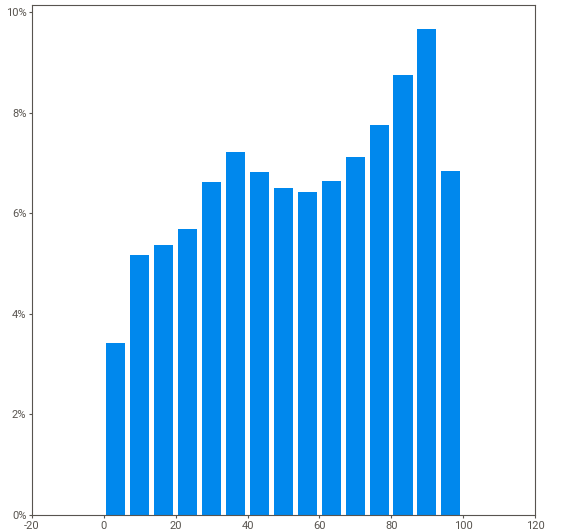
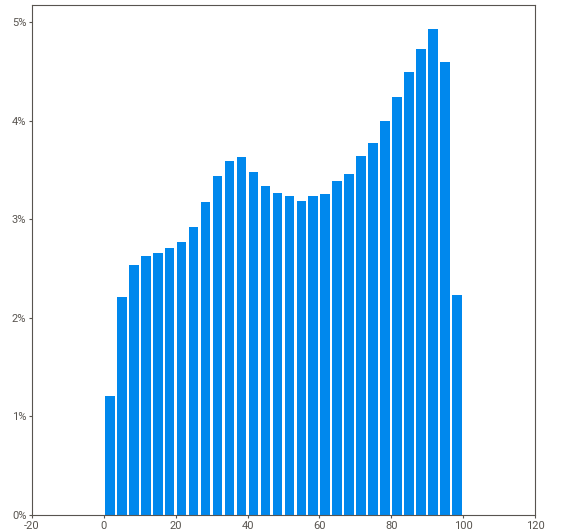
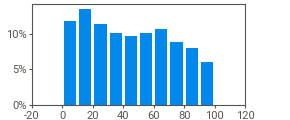
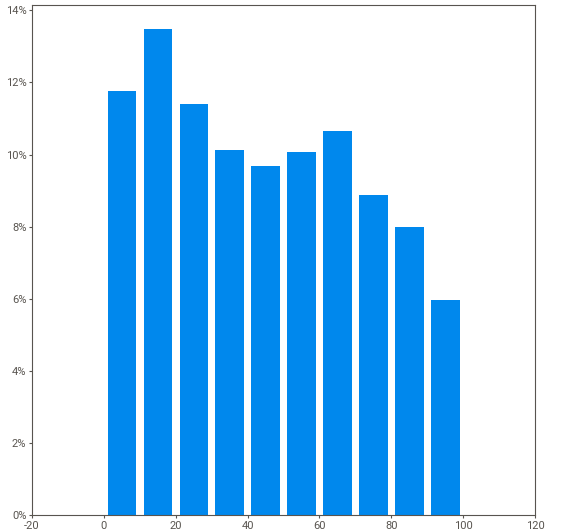
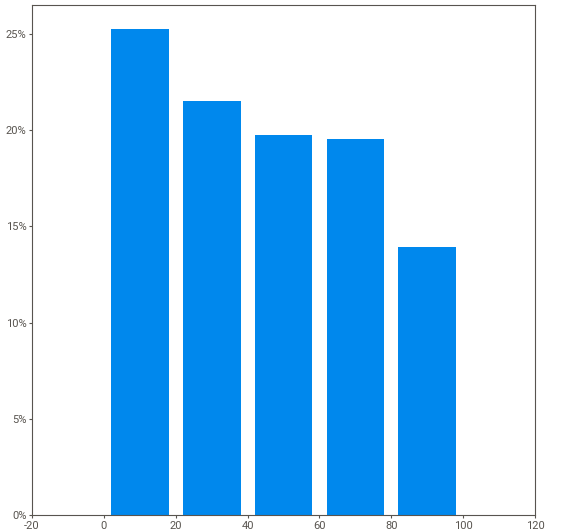
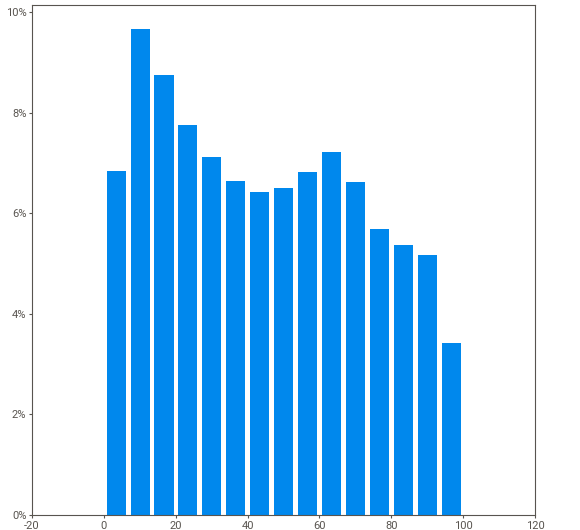
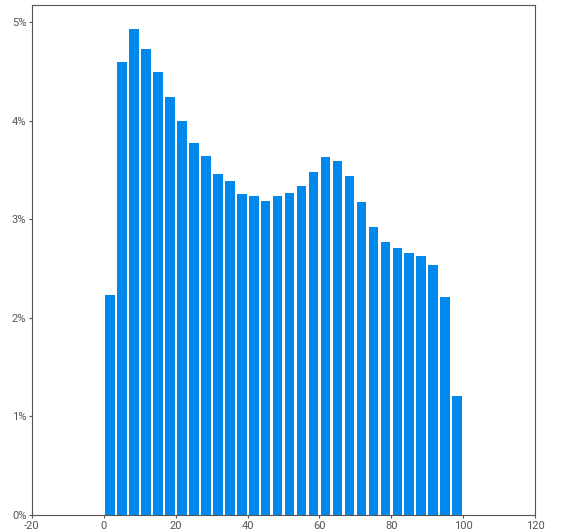
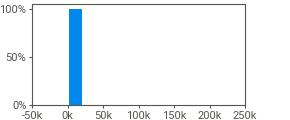
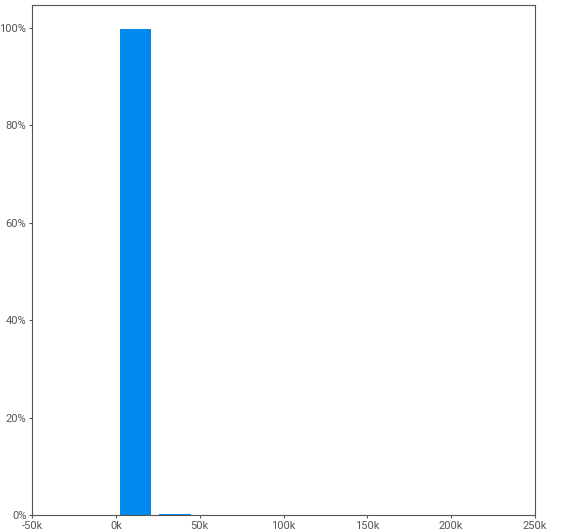
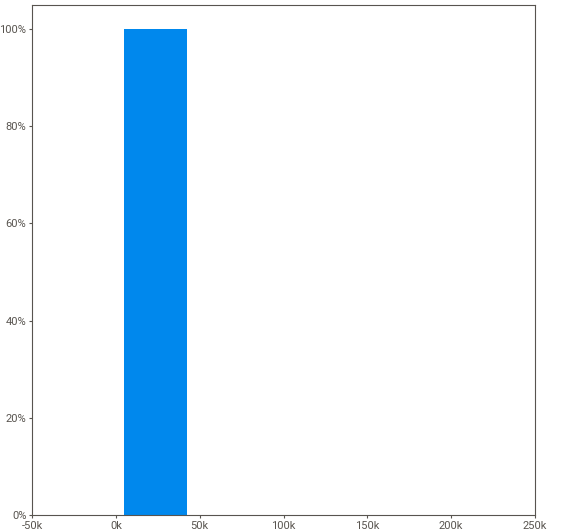
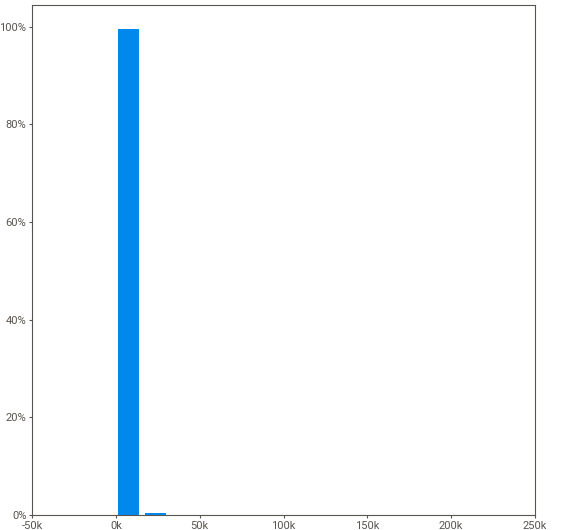
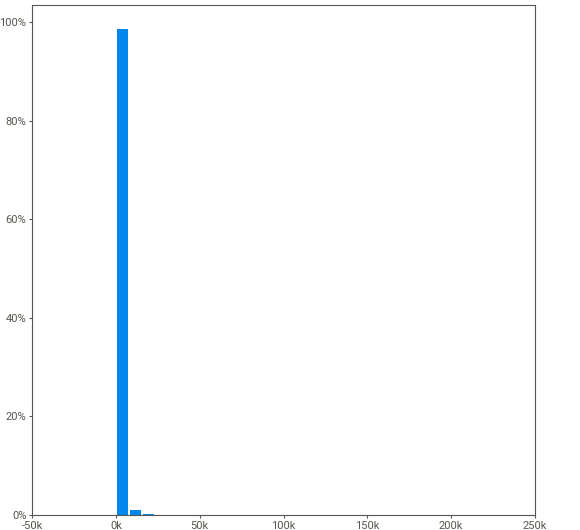
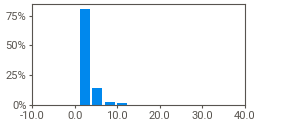
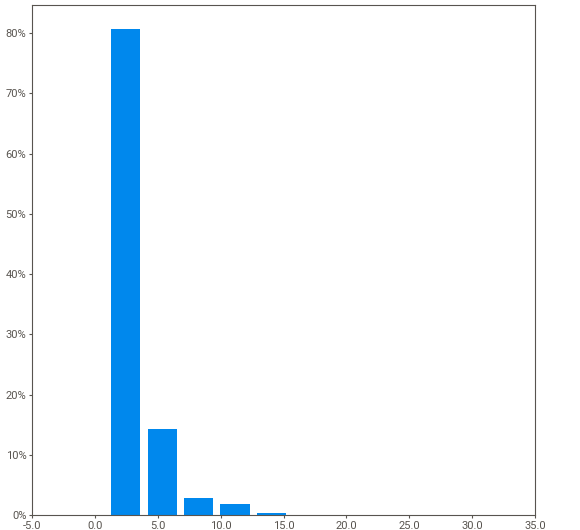
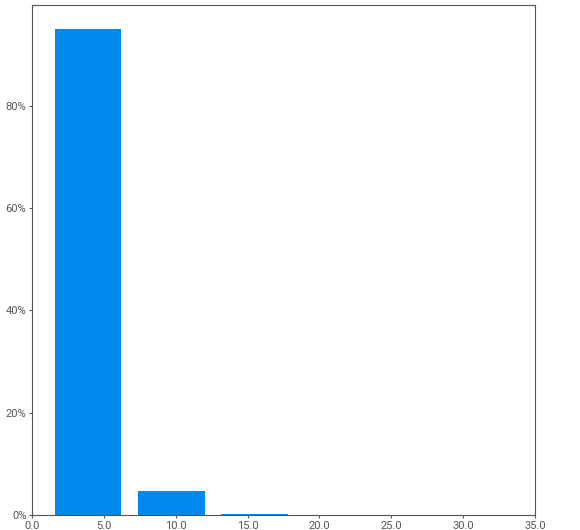
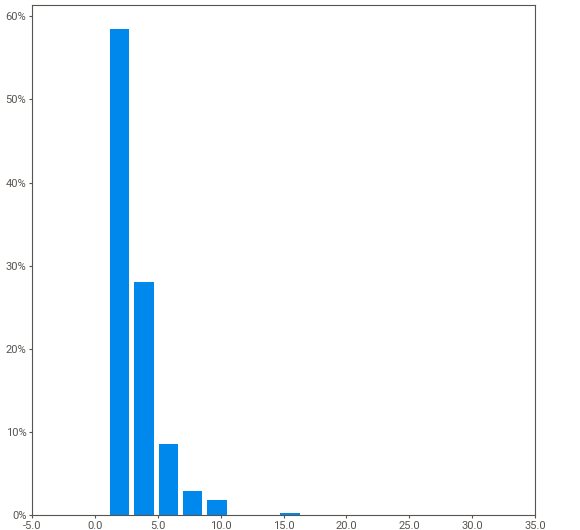
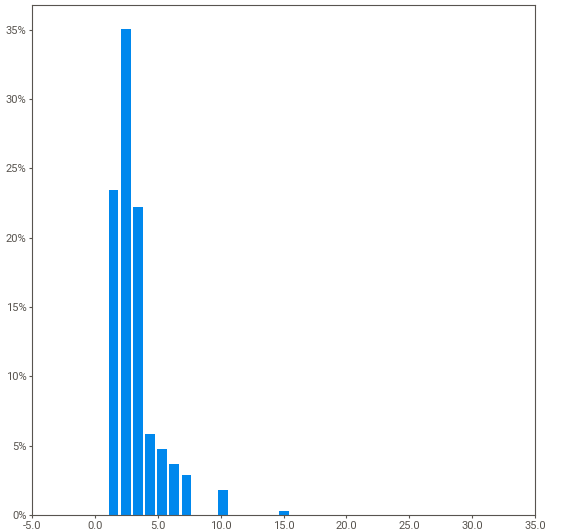
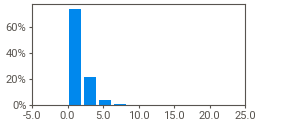
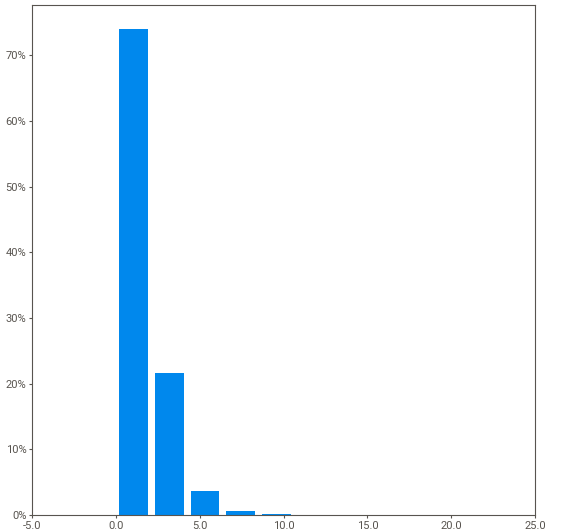
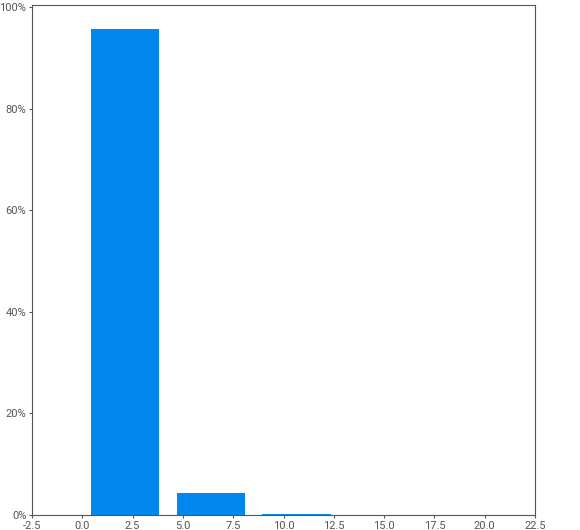
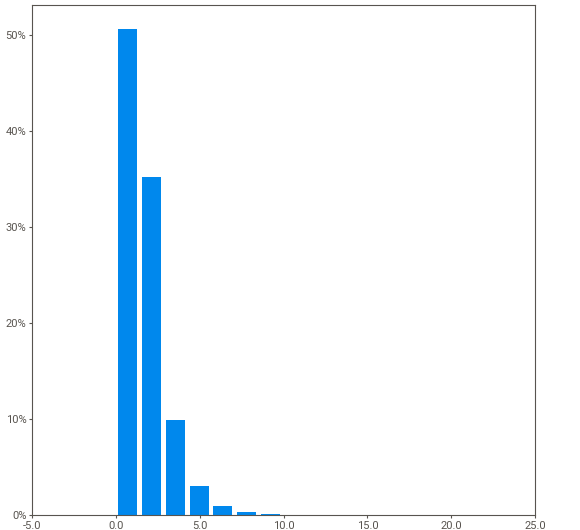
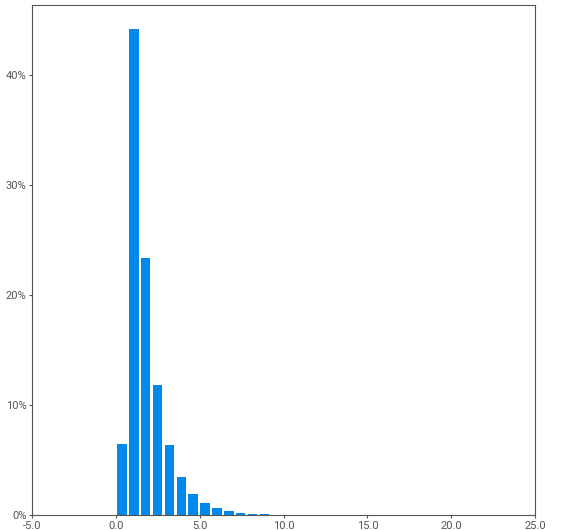
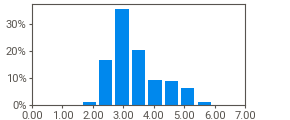
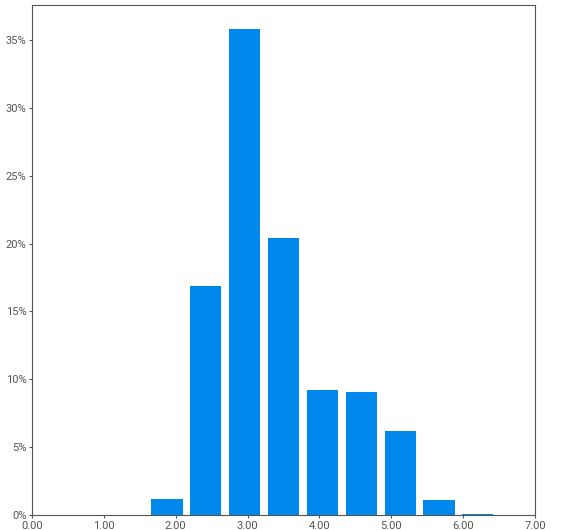
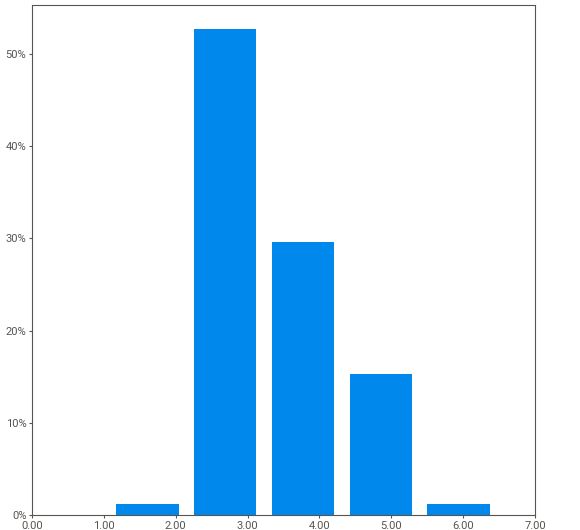
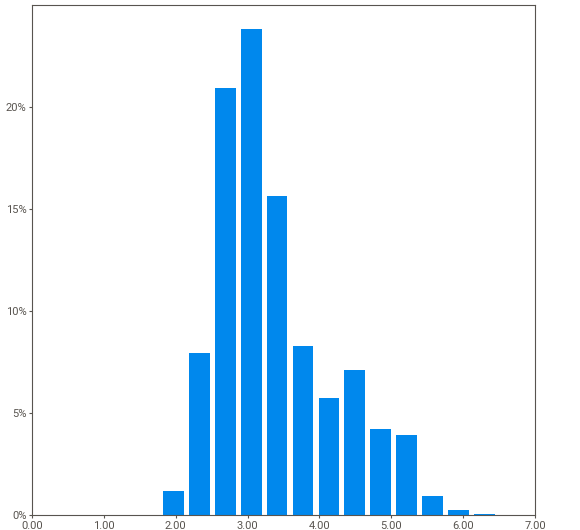
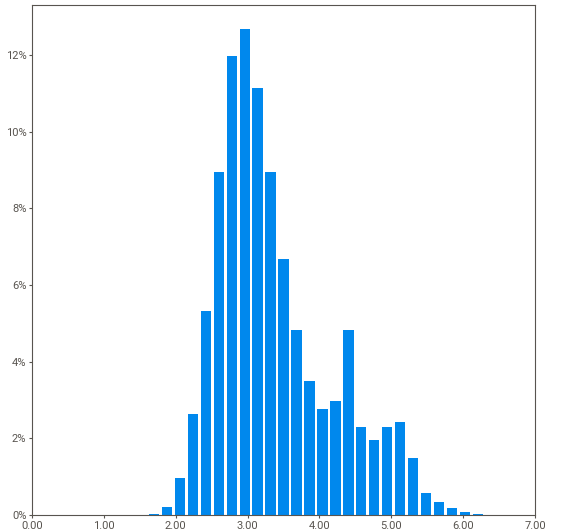
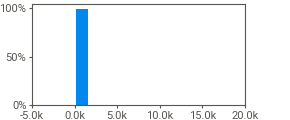
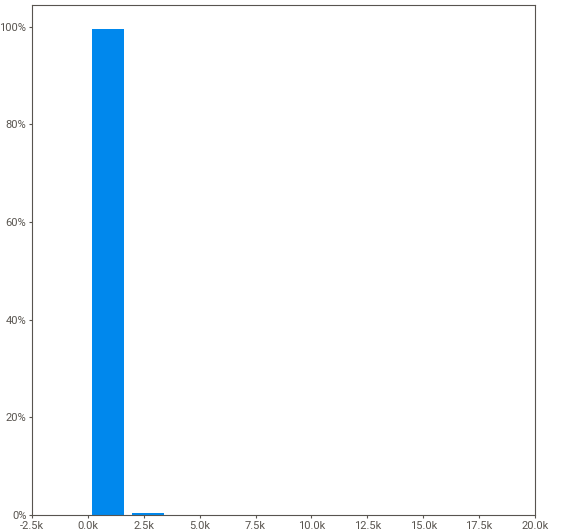
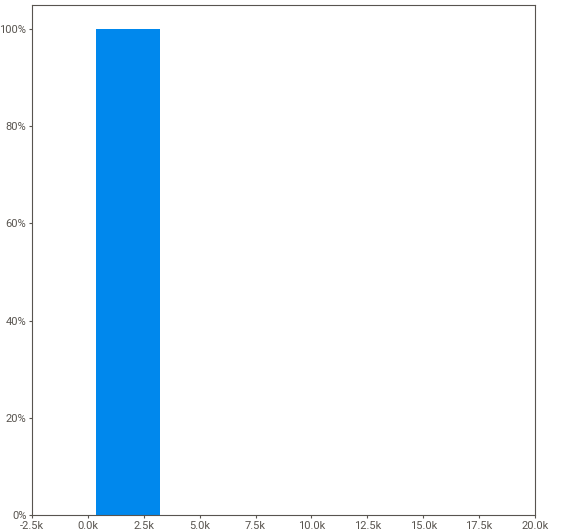
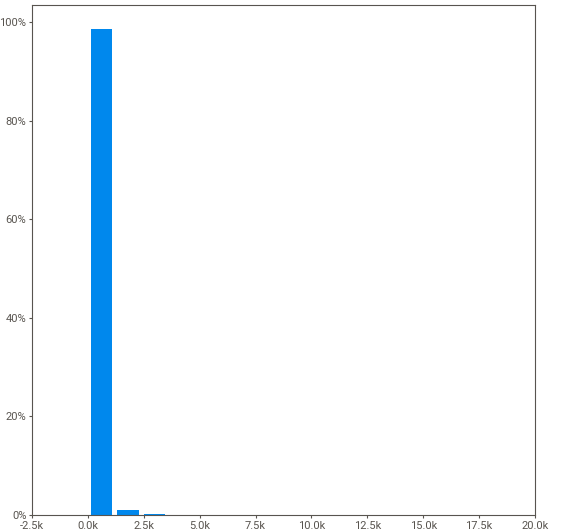
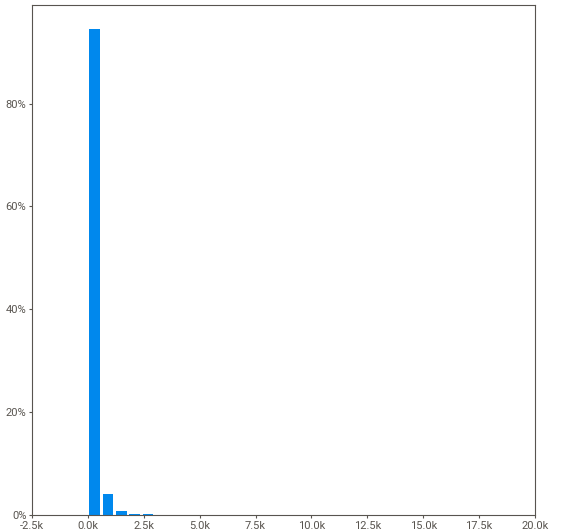
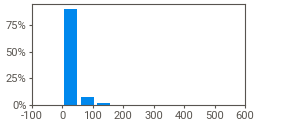
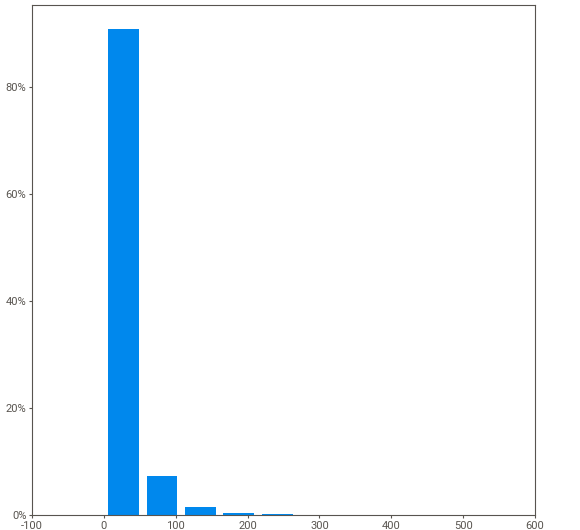
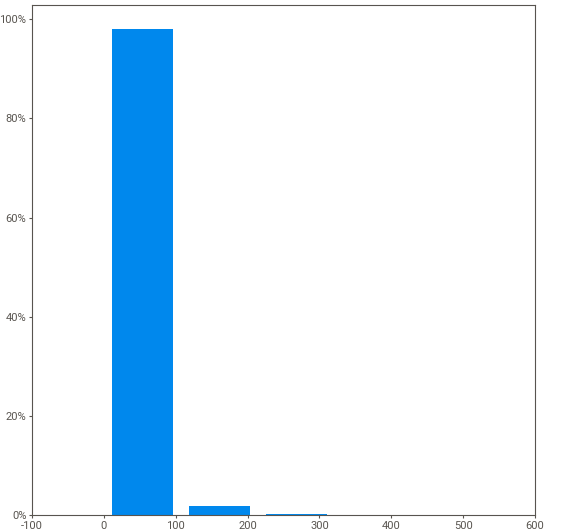
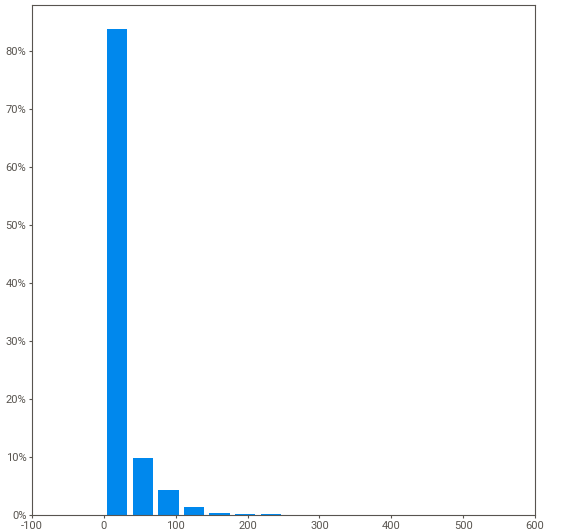
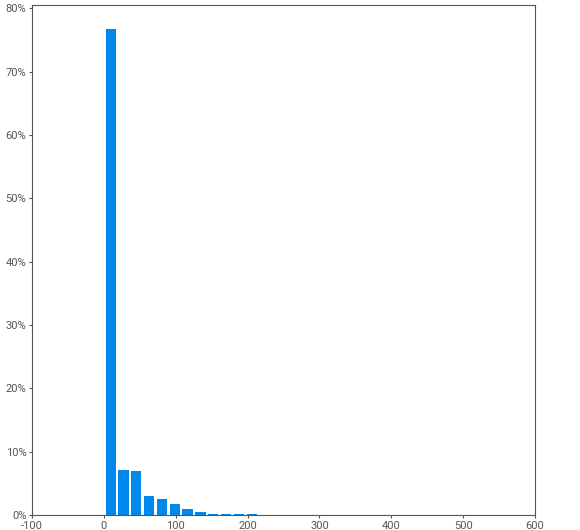
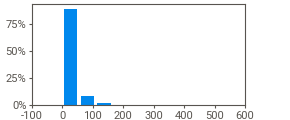
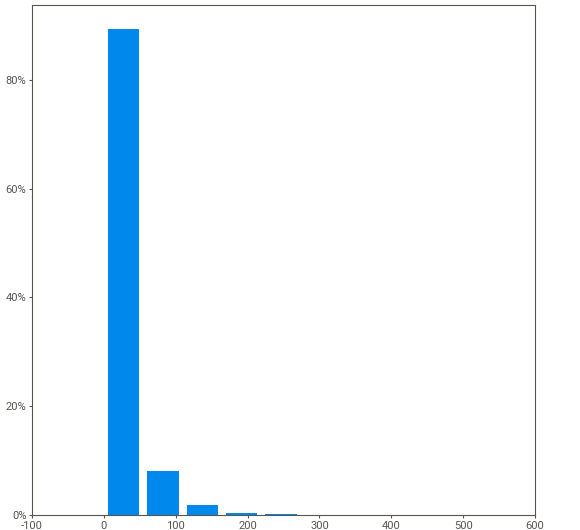
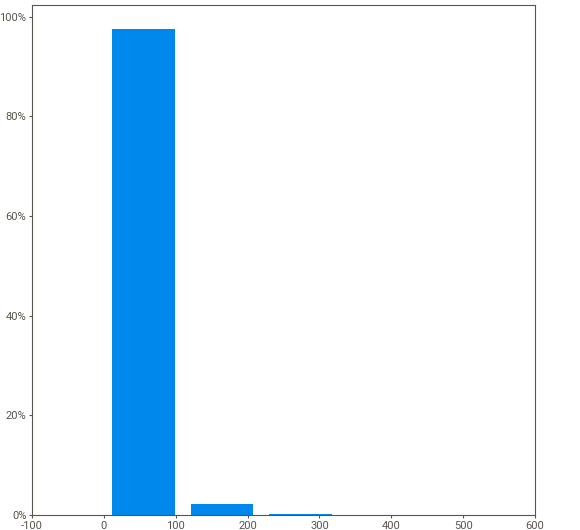
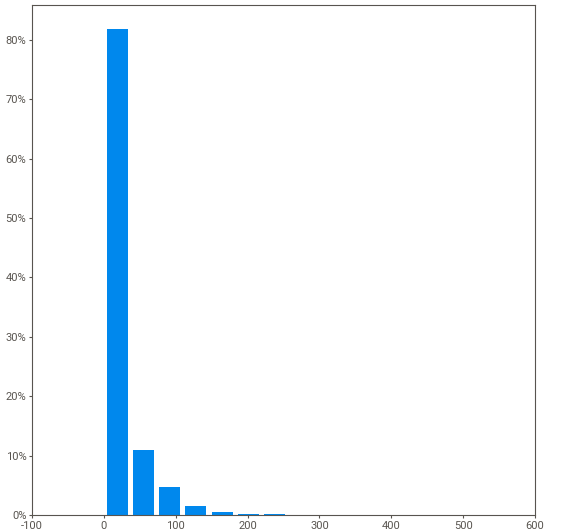
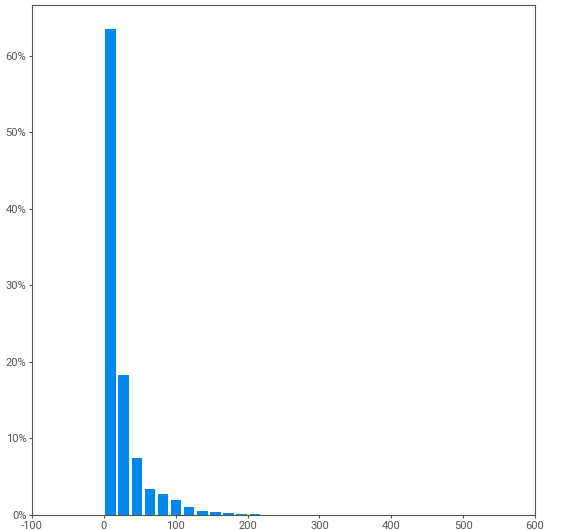
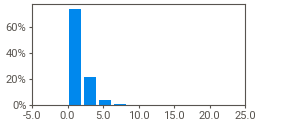
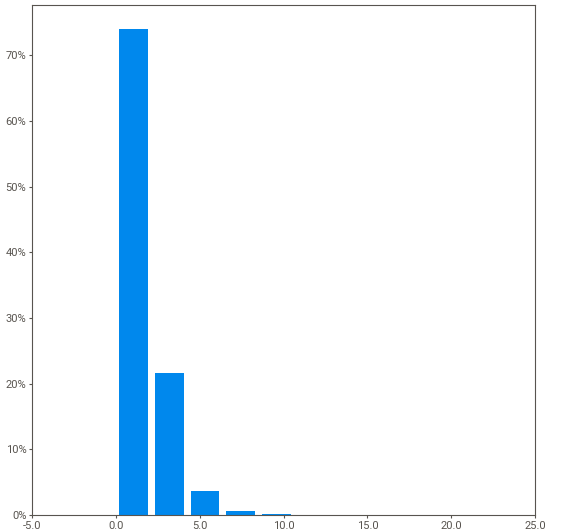
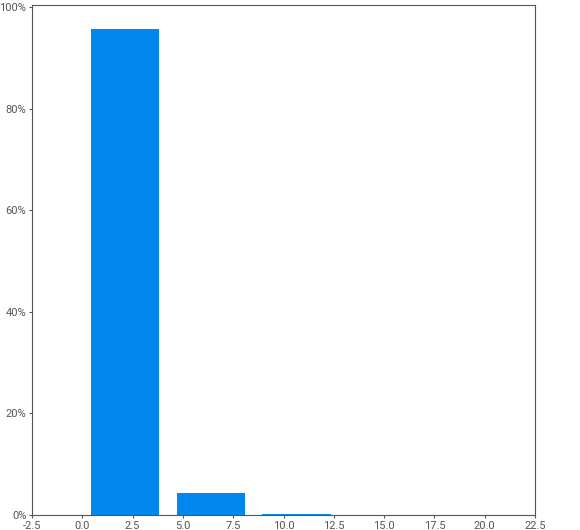
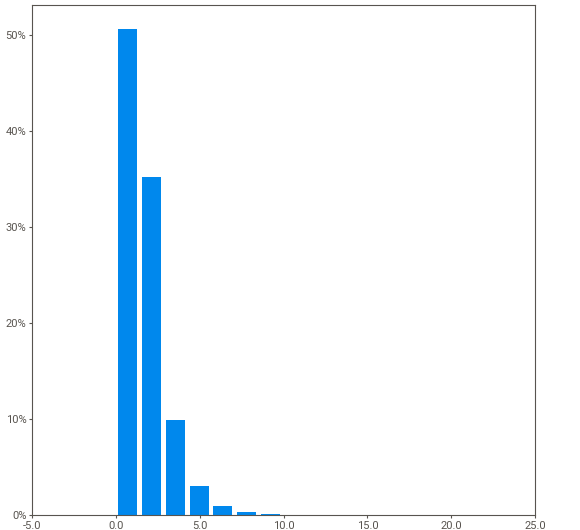
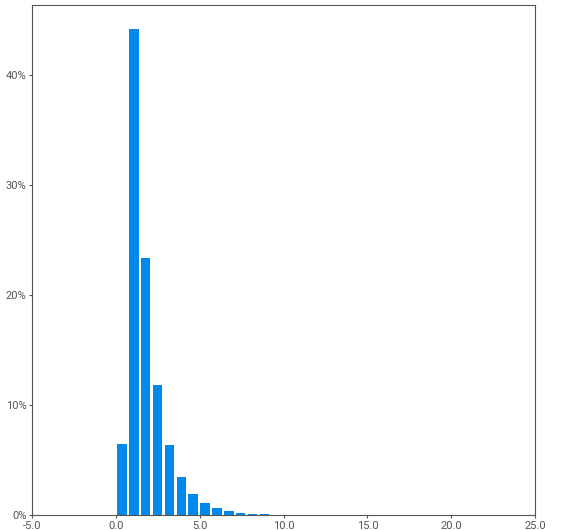
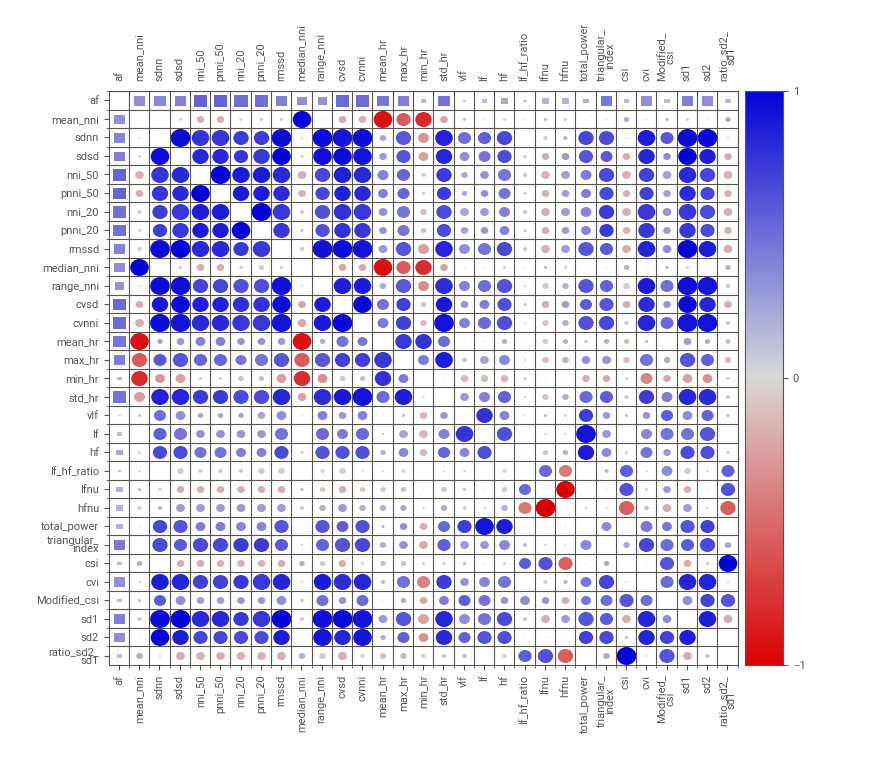
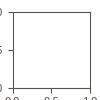

In [20]:
sv_af_df_featureEng = sv.analyze([af_df_featureEng, 'AF Data (Feature Engineered)'])
sv_af_df_featureEng.show_notebook(layout='widescreen', scale=0.8)

## Feature Selection

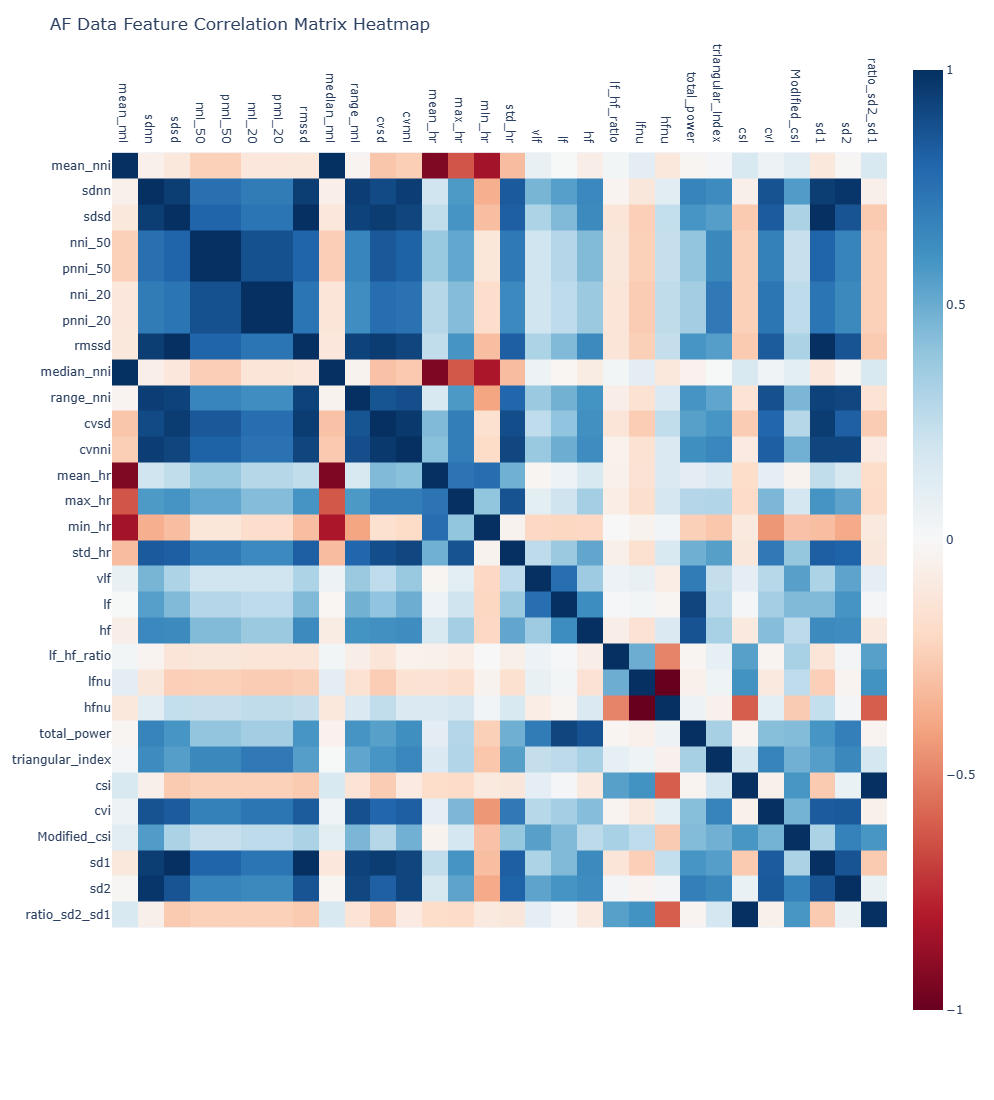

In [21]:
# Feature correlation matrix
corr_matrix = af_df_featureEng.corr()
fig = px.imshow(corr_matrix, color_continuous_scale="RdBu", zmin=-1, zmax=1)

# Add axis labels and title
fig.update_layout(title="AF Data Feature Correlation Matrix Heatmap", width=1000, height=1100)
fig.update_xaxes(side="top")

# Display correlation matrix heatmap
fig.show()

In [22]:
# Convert the dependent '1' and '0' from str to int
af_df_featureEng['af'] = af_df_featureEng['af'].astype(int)

In [23]:
y_cols = ['af']
X_cols = [col for col in af_df_featureEng.columns if col not in y_cols]

# Instantiate the SMOTE
sm = SMOTE(random_state=123)

# Fit and transform the data
X_smote, y_smote = sm.fit_resample(af_df_featureEng[X_cols], af_df_featureEng[y_cols])

# Split dataset into train & test
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_smote, y_smote, test_size = 0.2, random_state = 999)

## print info
print("X_train shape:", X_train.shape, "\nX_test shape:", X_test.shape)
print("\ny_train counts:", y_train.value_counts(), "\n\ny_test counts:", y_test.value_counts())
print("\nThere are ",X_train.shape[1]," independent features:\n",X_train.columns.to_list())

X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

# Numerical Features Scaling
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print('\nX_train & X_test has been scaled successfully!')

X_train shape: (1625985, 30) 
X_test shape: (406497, 30)

y_train counts: af
1     813244
0     812741
dtype: int64 

y_test counts: af
0     203500
1     202997
dtype: int64

There are  30  independent features:
 ['mean_nni', 'sdnn', 'sdsd', 'nni_50', 'pnni_50', 'nni_20', 'pnni_20', 'rmssd', 'median_nni', 'range_nni', 'cvsd', 'cvnni', 'mean_hr', 'max_hr', 'min_hr', 'std_hr', 'vlf', 'lf', 'hf', 'lf_hf_ratio', 'lfnu', 'hfnu', 'total_power', 'triangular_index', 'csi', 'cvi', 'Modified_csi', 'sd1', 'sd2', 'ratio_sd2_sd1']

X_train & X_test has been scaled successfully!


In [24]:
# Some features are correlated, so we need to remove some of them based on their feature importances

## call model
model_gradBoost = ensemble.GradientBoostingClassifier()

prediction = model_gradBoost.fit(X_train,y_train).predict(X_test)
true = y_test

print('Model metrics:\n')
print('Accuracy: %0.2f' % accuracy_score(true, prediction))
print('Precision: %0.2f' % precision_score(true, prediction))
print('Recall: %0.2f' % recall_score(true, prediction))
print('F1: %0.2f' % f1_score(true, prediction))

Model metrics:

Accuracy: 0.95
Precision: 0.97
Recall: 0.92
F1: 0.95


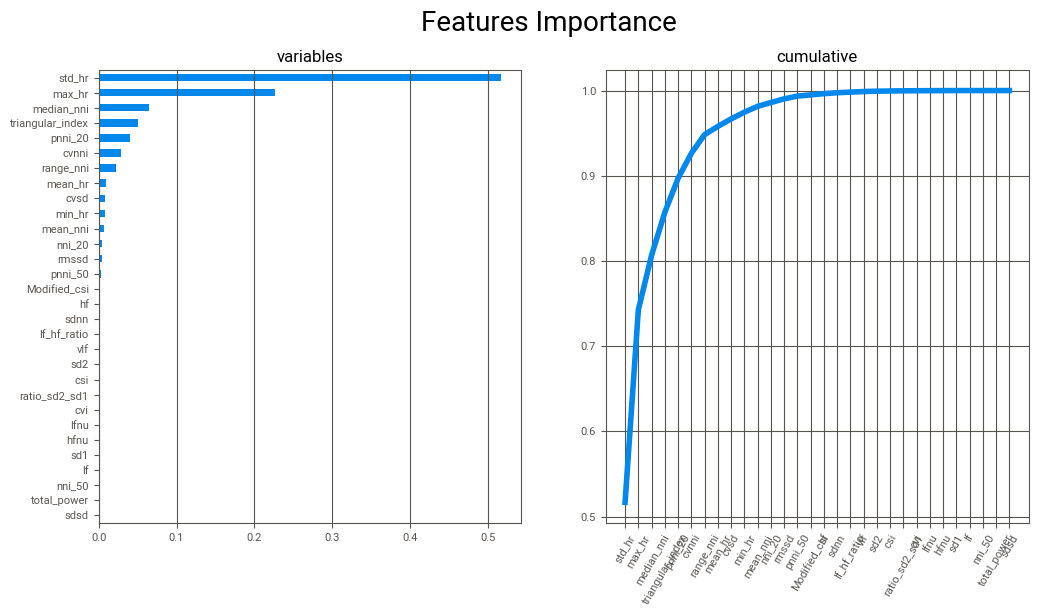

In [25]:
# Feature importance
importances = model_gradBoost.feature_importances_

## Put in a pandas dtf
df_importances = pd.DataFrame({"IMPORTANCE":importances, "VARIABLE":X_cols}).sort_values("IMPORTANCE", ascending=False)
df_importances['cumsum'] = df_importances['IMPORTANCE'].cumsum(axis=0)
df_importances = df_importances.set_index("VARIABLE")
    
## Plot
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(12,6))
fig.suptitle("Features Importance", fontsize=20)

# First graph: variables
ax[0].title.set_text('variables')
df_importances[["IMPORTANCE"]].sort_values(by="IMPORTANCE").plot(kind="barh", legend=False, ax=ax[0])
ax[0].set(ylabel="")
ax[0].grid(axis='x')

# Second graph: cumulative
ax[1].title.set_text('cumulative')
df_importances[["cumsum"]].plot(kind="line", linewidth=4, legend=False, ax=ax[1])
ax[1].set(xlabel="", xticks=np.arange(len(df_importances)), xticklabels=df_importances.index)
plt.xticks(rotation=60)
ax[1].grid(axis='both')

plt.show()

In [26]:
df_importances

IMPORTANCE    cumsum
VARIABLE                              
std_hr              0.516591  0.516591
max_hr              0.225926  0.742517
median_nni          0.064167  0.806684
triangular_index    0.050436  0.857120
pnni_20             0.039887  0.897007
cvnni               0.029282  0.926289
range_nni           0.021992  0.948281
mean_hr             0.009620  0.957901
cvsd                0.008796  0.966697
min_hr              0.007888  0.974585
mean_nni            0.006871  0.981455
nni_20              0.004475  0.985931
rmssd               0.004306  0.990236
pnni_50             0.003246  0.993482
Modified_csi        0.001458  0.994940
hf                  0.001408  0.996348
sdnn                0.001100  0.997448
lf_hf_ratio         0.000736  0.998184
vlf                 0.000672  0.998857
sd2                 0.000413  0.999269
csi                 0.000233  0.999503
ratio_sd2_sd1       0.000169  0.999672
cvi                 0.000135  0.999806
lfnu                0.000076  0.999882
hfnu                0.000059  0.999941
sd1                 0.000046  0.999986
lf                  0.000008  0.999995
nni_50              0.000005  1.000000
total_power         0.000000  1.000000
sdsd                0.000000  1.000000

#### Select features based on feature importance

In [27]:
# Keep important features above the threshold
threshold = 0.01
important_features = df_importances[df_importances['IMPORTANCE'] > threshold].index.tolist()
af_df_featureImp = af_df_featureEng[important_features+['af']+['hf','lf_hf_ratio','vlf']]
print(important_features)

['std_hr', 'max_hr', 'median_nni', 'triangular_index', 'pnni_20', 'cvnni', 'range_nni']


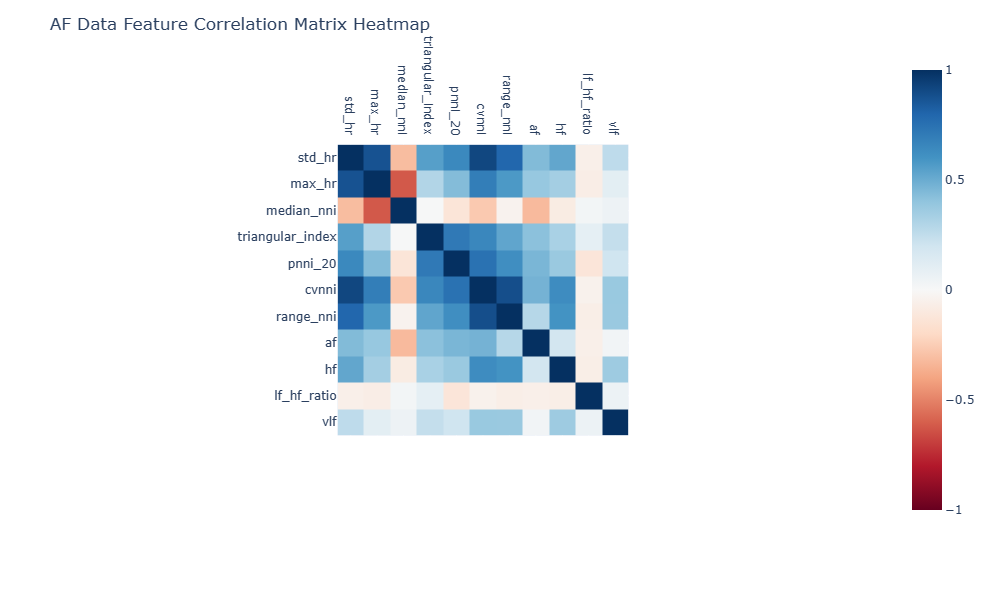

In [28]:
# Feature correlation matrix
corr_matrix = af_df_featureImp.corr()
fig = px.imshow(corr_matrix, color_continuous_scale="RdBu", zmin=-1, zmax=1)

# Add axis labels and title
fig.update_layout(title="AF Data Feature Correlation Matrix Heatmap", width=500, height=600)
fig.update_xaxes(side="top")

# Display correlation matrix heatmap
fig.show()

In [29]:
y_cols = ['af']
X_cols = [col for col in af_df_featureImp.columns if col not in y_cols]

# Instantiate the SMOTE
sm = SMOTE(random_state=123)

# Fit and transform the data
X_smote, y_smote = sm.fit_resample(af_df_featureImp[X_cols], af_df_featureImp[y_cols])

# Split dataset into train & test
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_smote, y_smote, test_size = 0.2, random_state = 999)

## print info
print("X_train shape:", X_train.shape, "\nX_test shape:", X_test.shape)
print("\ny_train counts:", y_train.value_counts(), "\n\ny_test counts:", y_test.value_counts())
print("\nThere are ",X_train.shape[1]," independent features:\n",X_train.columns.to_list())

X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

# Numerical Features Scaling
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print('\nX_train & X_test has been scaled successfully!')

X_train shape: (1625985, 10) 
X_test shape: (406497, 10)

y_train counts: af
1     813244
0     812741
dtype: int64 

y_test counts: af
0     203500
1     202997
dtype: int64

There are  10  independent features:
 ['std_hr', 'max_hr', 'median_nni', 'triangular_index', 'pnni_20', 'cvnni', 'range_nni', 'hf', 'lf_hf_ratio', 'vlf']

X_train & X_test has been scaled successfully!


In [30]:
## call model
model_gradBoost = ensemble.GradientBoostingClassifier()

prediction = model_gradBoost.fit(X_train,y_train).predict(X_test)
true = y_test

print('Model metrics:\n')
print('Accuracy: %0.2f' % accuracy_score(true, prediction))
print('Precision: %0.2f' % precision_score(true, prediction))
print('Recall: %0.2f' % recall_score(true, prediction))
print('F1: %0.2f' % f1_score(true, prediction))

Model metrics:

Accuracy: 0.94
Precision: 0.97
Recall: 0.92
F1: 0.94


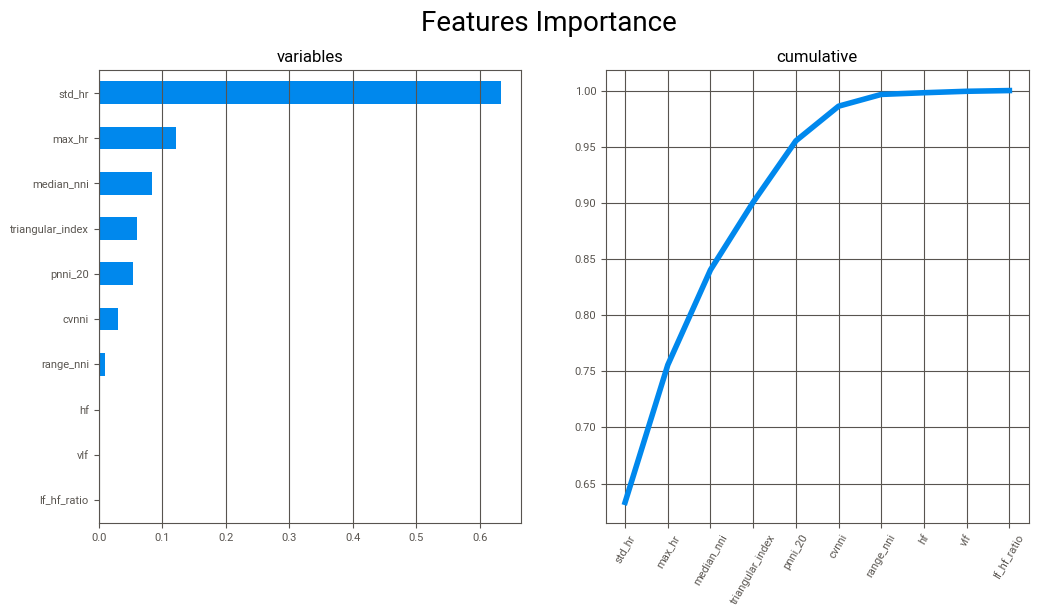

In [31]:
# Feature importance
importances = model_gradBoost.feature_importances_

## Put in a pandas dtf
df_importances = pd.DataFrame({"IMPORTANCE":importances, "VARIABLE":X_cols}).sort_values("IMPORTANCE", ascending=False)
df_importances['cumsum'] = df_importances['IMPORTANCE'].cumsum(axis=0)
df_importances = df_importances.set_index("VARIABLE")
    
## Plot
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(12,6))
fig.suptitle("Features Importance", fontsize=20)

# First graph: variables
ax[0].title.set_text('variables')
df_importances[["IMPORTANCE"]].sort_values(by="IMPORTANCE").plot(kind="barh", legend=False, ax=ax[0])
ax[0].set(ylabel="")
ax[0].grid(axis='x')

# Second graph: cumulative
ax[1].title.set_text('cumulative')
df_importances[["cumsum"]].plot(kind="line", linewidth=4, legend=False, ax=ax[1])
ax[1].set(xlabel="", xticks=np.arange(len(df_importances)), xticklabels=df_importances.index)
plt.xticks(rotation=60)
ax[1].grid(axis='both')

plt.show()

In [32]:
df_importances

IMPORTANCE    cumsum
VARIABLE                              
std_hr              0.633248  0.633248
max_hr              0.122380  0.755627
median_nni          0.084681  0.840309
triangular_index    0.060308  0.900617
pnni_20             0.054595  0.955212
cvnni               0.030877  0.986089
range_nni           0.010478  0.996567
hf                  0.001496  0.998063
vlf                 0.001294  0.999356
lf_hf_ratio         0.000644  1.000000

#### Remove features with high correlation

In [33]:
features_to_remove = ['max_hr', 'cvnni']
af_df_featureSlct = af_df_featureImp.drop(features_to_remove, axis=1)
print(af_df_featureSlct.shape)
af_df_featureSlct.head()

(1049993, 9)


std_hr  median_nni  triangular_index   pnni_20  range_nni  af         hf  \
0  6.430783       780.0          3.750000  3.448276        265   0  24.396620   
1  0.584538       790.0          1.875000  0.000000         25   0  11.057630   
2  0.781545       790.0          2.142857  0.000000         35   0  19.919897   
3  0.844818       792.5          2.500000  0.000000         35   0  29.719194   
4  1.027328       782.5          3.750000  0.000000         35   0   9.453751   

   lf_hf_ratio        vlf  
0     2.918488  34.959704  
1     0.252836   2.853465  
2     0.938439  11.392116  
3     0.556774  10.752915  
4     4.409898  11.581953

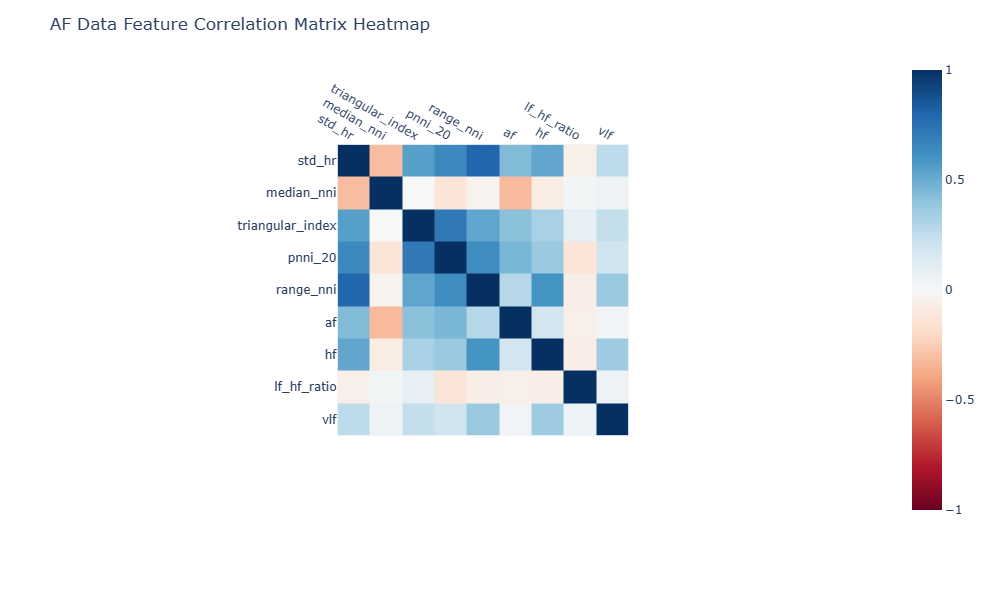

In [34]:
# Feature correlation matrix
corr_matrix = af_df_featureSlct.corr()
fig = px.imshow(corr_matrix, color_continuous_scale="RdBu", zmin=-1, zmax=1)

# Add axis labels and title
fig.update_layout(title="AF Data Feature Correlation Matrix Heatmap", width=500, height=600)
fig.update_xaxes(side="top")

# Display correlation matrix heatmap
fig.show()

In [35]:
y_cols = ['af']
X_cols = [col for col in af_df_featureSlct.columns if col not in y_cols]

# Instantiate the SMOTE
sm = SMOTE(random_state=123)

# Fit and transform the data
X_smote, y_smote = sm.fit_resample(af_df_featureSlct[X_cols], af_df_featureSlct[y_cols])

# Split dataset into train & test
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_smote, y_smote, test_size = 0.2, random_state = 999)

## print info
print("X_train shape:", X_train.shape, "\nX_test shape:", X_test.shape)
print("\ny_train counts:", y_train.value_counts(), "\n\ny_test counts:", y_test.value_counts())
print("\nThere are ",X_train.shape[1]," independent features:\n",X_train.columns.to_list())

X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

# Numerical Features Scaling
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print('\nX_train & X_test has been scaled successfully!')

X_train shape: (1625985, 8) 
X_test shape: (406497, 8)

y_train counts: af
1     813244
0     812741
dtype: int64 

y_test counts: af
0     203500
1     202997
dtype: int64

There are  8  independent features:
 ['std_hr', 'median_nni', 'triangular_index', 'pnni_20', 'range_nni', 'hf', 'lf_hf_ratio', 'vlf']

X_train & X_test has been scaled successfully!


In [36]:
## call model
model_gradBoost = ensemble.GradientBoostingClassifier()

prediction = model_gradBoost.fit(X_train,y_train).predict(X_test)
true = y_test

print('Model metrics:\n')
print('Accuracy: %0.2f' % accuracy_score(true, prediction))
print('Precision: %0.2f' % precision_score(true, prediction))
print('Recall: %0.2f' % recall_score(true, prediction))
print('F1: %0.2f' % f1_score(true, prediction))

Model metrics:

Accuracy: 0.95
Precision: 0.97
Recall: 0.92
F1: 0.95


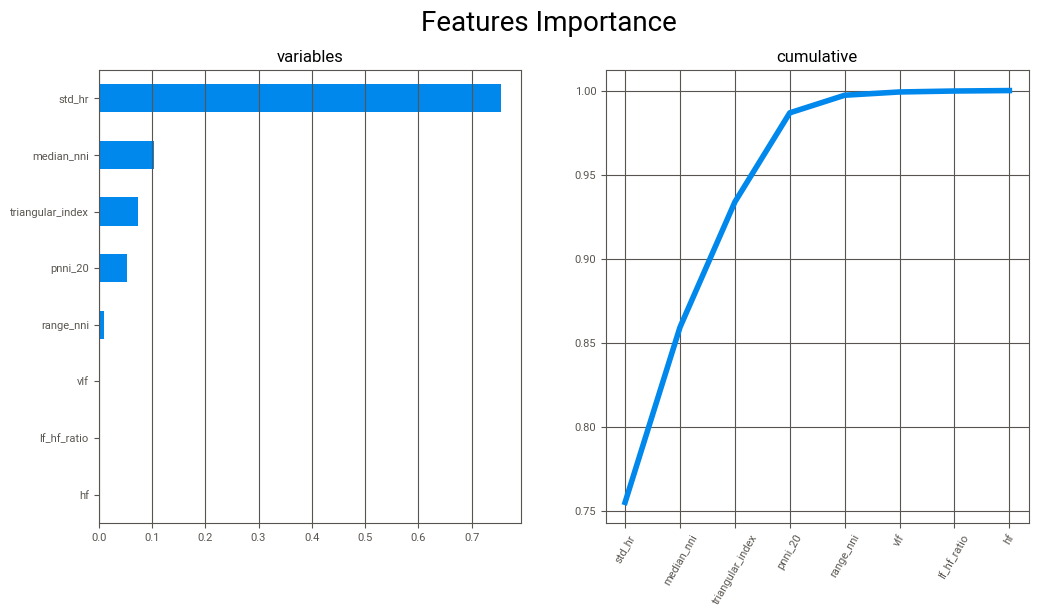

In [37]:
# Feature importance
importances = model_gradBoost.feature_importances_

## Put in a pandas dtf
df_importances = pd.DataFrame({"IMPORTANCE":importances, "VARIABLE":X_cols}).sort_values("IMPORTANCE", ascending=False)
df_importances['cumsum'] = df_importances['IMPORTANCE'].cumsum(axis=0)
df_importances = df_importances.set_index("VARIABLE")
    
## Plot
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(12,6))
fig.suptitle("Features Importance", fontsize=20)

# First graph: variables
ax[0].title.set_text('variables')
df_importances[["IMPORTANCE"]].sort_values(by="IMPORTANCE").plot(kind="barh", legend=False, ax=ax[0])
ax[0].set(ylabel="")
ax[0].grid(axis='x')

# Second graph: cumulative
ax[1].title.set_text('cumulative')
df_importances[["cumsum"]].plot(kind="line", linewidth=4, legend=False, ax=ax[1])
ax[1].set(xlabel="", xticks=np.arange(len(df_importances)), xticklabels=df_importances.index)
plt.xticks(rotation=60)
ax[1].grid(axis='both')

plt.show()

In [38]:
df_importances

IMPORTANCE    cumsum
VARIABLE                              
std_hr              0.755182  0.755182
median_nni          0.104110  0.859292
triangular_index    0.074486  0.933778
pnni_20             0.052983  0.986762
range_nni           0.010462  0.997224
vlf                 0.001942  0.999165
lf_hf_ratio         0.000565  0.999730
hf                  0.000270  1.000000

In [ ]:
# Save the results for modelling
af_df_featureImp.to_parquet('/dbfs/FileStore/tables/Michael/AF/af_df_featureImp_200.parquet', index=False)
# af_df_featureImp.to_parquet('/dbfs/FileStore/tables/Michael/AF/af_df_featureImp_804.parquet', index=False)